In [1]:
import time
start_time = time.time()
# print('start_time: ', start_time)
import PySimpleGUI as sg
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.backends.backend_tkagg import FigureCanvasAgg
# import matplotlib.backends.tkagg as tkagg
import tkinter as Tk
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle
import torch
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict
%matplotlib inline
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
## Transforms features by scaling each feature to a given range.
## This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.
## This transformation is often used as an alternative to zero mean, unit variance scaling.
## fit(X[, y])	Compute the minimum and maximum to be used for later scaling.
## transform(X)	Scaling features of X according to feature_range.
## fit_transform(X[, y])	Fit to data, then transform it.
## inverse_transform(X)	Undo the scaling of X according to feature_range.
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
no_of_output_nodes = 4
df_1 = pd.read_excel('DataSet_of_NanoAntenna.xlsx', sheet_name = 'Sheet1')
datafile_1 = df_1.values                  ## stored data from xlsx file  WHY WE ARE STORING VALUES IN dtafile_1
#print(datafile_1)

##########    taking data from other sheets    #############
##sheets_names = ['SiO2-air-rings-4-dBYp-0.8', 'SiO2-air-rings-4-dBYp-0.9',
               ## 'SiO2-air-rings-4-dBYp-0.7', 'SiO2-air-rings-5-dBYp-0.6',
                ##'SiO2-air-rings-5-dBYp-0.8', 'SiO2-air-rings-5-dBYp-0.9',
                ##'SiO2-air-rings-4-dBYp-0.6']
##sheets_names = []
##for sheet_name in sheets_names:
   ## print(sheet_name)
   ## df_sheet_name = pd.read_excel('DataSet.xlsx', sheet_name=sheet_name)
   ## datafile_sheet_name = df_sheet_name.values                  ## stored data from xlsx file
    #print(datafile_sheet_name)
    #########    combining data from all sheets of excel file    #########
  ##  datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)

print(datafile_1)
print(len(datafile_1))
print(datafile_1[:,0])

cpu
[[ 30.          10.          10.         ...  19.8795018   30.57190327
  607.754206  ]
 [ 30.          10.          20.         ...   3.87654    147.69767886
  572.55596   ]
 [ 30.          10.          30.         ...   4.410499   129.77659875
  572.379559  ]
 ...
 [120.         120.         100.         ... 133.15303      4.71097466
  627.28055   ]
 [120.         120.         110.         ... 137.3041       4.5318831
  622.24613   ]
 [120.         120.         120.         ... 148.87778      4.1775537
  621.94492   ]]
640
[ 30.  30.  30.  40.  40.  40.  40.  50.  50.  50.  50.  50.  60.  60.
  60.  60.  60.  60.  70.  70.  70.  70.  70.  70.  70.  80.  80.  80.
  80.  80.  80.  80.  80.  90.  90.  90.  90.  90.  90.  90.  90.  90.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130. 130. 130. 130.  30.  30.  30.  40.

In [2]:
df_1.head()

,Major Axis Variation,Gap,Minor Axis Variation,Height Variation,Sensitivity nm/RIU,FWHM,Q - Factor,Plasmonic Wavelength
0,30,10,10,40,75.27432,19.879502,30.571903,607.754206
1,30,10,20,40,49.74397,3.876540,147.697679,572.555960
2,30,10,30,40,47.13430,4.410499,129.776599,572.379559
3,40,10,10,40,158.74843,18.158348,35.134722,637.988515
4,40,10,20,40,85.44257,15.963855,36.833226,588.000293


In [3]:
df_1.columns

Index(['Major Axis Variation', 'Gap', 'Minor Axis Variation',
       'Height Variation', 'Sensitivity  nm/RIU', 'FWHM', 'Q - Factor ',
       'Plasmonic Wavelength'],
      dtype='object')

In [4]:
########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(4,8)]  ## stored output_variable (4th column) from xlsx file Sensitivity to PL
print(out_var_datafile_1)

[[ 75.27432     19.8795018   30.57190327 607.754206  ]
 [ 49.74397      3.87654    147.69767886 572.55596   ]
 [ 47.1343       4.410499   129.77659875 572.379559  ]
 ...
 [139.28571    133.15303      4.71097466 627.28055   ]
 [137.09122    137.3041       4.5318831  622.24613   ]
 [119.53528    148.87778      4.1775537  621.94492   ]]


In [5]:
out_var_datafile_1 = out_var_datafile_1.reshape((-1, no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)                                                    ## one WHY WE ARE DOING THIS?
print('no. of training points: ', len(out_var_datafile_1))

[[ 75.27432     19.8795018   30.57190327 607.754206  ]
 [ 49.74397      3.87654    147.69767886 572.55596   ]
 [ 47.1343       4.410499   129.77659875 572.379559  ]
 ...
 [139.28571    133.15303      4.71097466 627.28055   ]
 [137.09122    137.3041       4.5318831  622.24613   ]
 [119.53528    148.87778      4.1775537  621.94492   ]]
no. of training points:  640


In [6]:
A = scaler1.fit(datafile_1)
print(A)
B = scaler2.fit(out_var_datafile_1)
print(B)
print(datafile_1)
print('\n')
scaler_datafile_1 = scaler1.transform(datafile_1)              ## WHY WE ARE TRANSFORMING THESE VALUES
print(scaler_datafile_1)
print()
scaler_datafile_2 =  scaler1.inverse_transform(scaler_datafile_1)
print(scaler_datafile_2)

MinMaxScaler()
MinMaxScaler()
[[ 30.          10.          10.         ...  19.8795018   30.57190327
  607.754206  ]
 [ 30.          10.          20.         ...   3.87654    147.69767886
  572.55596   ]
 [ 30.          10.          30.         ...   4.410499   129.77659875
  572.379559  ]
 ...
 [120.         120.         100.         ... 133.15303      4.71097466
  627.28055   ]
 [120.         120.         110.         ... 137.3041       4.5318831
  622.24613   ]
 [120.         120.         120.         ... 148.87778      4.1775537
  621.94492   ]]


[[0.         0.         0.         ... 0.08508714 0.14335131 0.09865608]
 [0.         0.         0.08333333 ... 0.00487247 0.75150635 0.02976006]
 [0.         0.         0.16666667 ... 0.00754893 0.65845429 0.02941477]
 ...
 [0.9        1.         0.75       ... 0.65286951 0.00907297 0.13687638]
 [0.9        1.         0.83333333 ... 0.67367671 0.00814307 0.12702216]
 [0.9        1.         0.91666667 ... 0.73168966 0.00630328 0.12643258]

In [7]:
X = scaler_datafile_1[:,range(0,4)] ## input variables columns Major, Minor, Gap, Height
y = scaler_datafile_1[:,range(4,8)] ## output variables columns Sensitivity, FWHM, Q-Factor, PL
print(X)
print('\n')
print(y)
X, y = shuffle(X, y)      ## WHY WE ARE USING SHUFFLE HERE
print('\n')
print(X)
print('\n')
print(y)

[[0.         0.         0.         0.        ]
 [0.         0.         0.08333333 0.        ]
 [0.         0.         0.16666667 0.        ]
 ...
 [0.9        1.         0.75       0.        ]
 [0.9        1.         0.83333333 0.        ]
 [0.9        1.         0.91666667 0.        ]]


[[0.08574346 0.08508714 0.14335131 0.09865608]
 [0.04083669 0.00487247 0.75150635 0.02976006]
 [0.03624639 0.00754893 0.65845429 0.02941477]
 ...
 [0.19833669 0.65286951 0.00907297 0.13687638]
 [0.19447668 0.67367671 0.00814307 0.12702216]
 [0.16359655 0.73168966 0.00630328 0.12643258]]


[[0.6        0.         0.58333333 0.        ]
 [0.5        0.36363636 0.58333333 0.        ]
 [0.5        0.         0.16666667 0.        ]
 ...
 [0.6        0.72727273 0.16666667 0.        ]
 [0.8        0.90909091 0.33333333 0.        ]
 [0.8        0.         0.83333333 0.        ]]


[[0.29755465 0.34242689 0.03010433 0.13042227]
 [0.09078151 0.11592999 0.10146082 0.05576845]
 [0.40664753 0.24998561 0.04859232 0

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.1)
X_train = X_train.reshape(-1, 4)                            ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)           ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 4)                  ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes) ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))             ##  Validation = test
print('no. of validation points: ', len(X_validation))

no. of training points:  576
no. of validation points:  64


In [9]:
print(X_train)
print(y_validation)

[[1.         0.         0.16666667 0.        ]
 [0.7        0.45454545 0.         0.        ]
 [0.9        0.72727273 0.58333333 0.        ]
 ...
 [0.7        0.18181818 0.75       0.        ]
 [0.6        0.63636364 0.66666667 0.        ]
 [0.7        0.27272727 0.41666667 0.        ]]
[[0.26607619 0.57274487 0.01415299 0.21385732]
 [0.37538579 0.45129977 0.02177473 0.21107861]
 [0.30414655 0.30078784 0.04112617 0.24935785]
 [0.10282023 0.33183802 0.02906094 0.06701239]
 [0.25003064 0.5062779  0.01563507 0.12424275]
 [0.08188328 0.18326418 0.06174142 0.056559  ]
 [0.2113548  0.28382633 0.03736711 0.09291134]
 [0.29270436 0.32045349 0.03666288 0.22048806]
 [0.31424187 0.59633906 0.01167155 0.15226952]
 [0.29453435 0.45822006 0.02006294 0.16955538]
 [0.23257077 0.07645988 0.16704295 0.15783585]
 [0.15110828 0.39140297 0.02305916 0.08288867]
 [0.53385534 0.63783159 0.01445705 0.37337801]
 [0.28338478 0.31248945 0.03735489 0.20633297]
 [0.36446876 0.3009506  0.03921224 0.20463478]
 [0.358

In [10]:
###########     manual testing  for Minor Variation  #########
df_2 = pd.read_excel('DataSet_of_NanoAntenna.xlsx', sheet_name = 'Sheet-test')
df_2.head()
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)
scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(0,4)]                     ## input variables columns
y_test = scaler_datafile_2[:,range(4,8)]                     ## output variables columns
print(X_test)
print('\n')
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, 4)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
#######################################################

[[ 90.          10.          10.          40.         491.337
   86.91014      9.82107128 853.55068   ]
 [ 90.          10.          20.          40.         352.207
   70.66833     10.2311014  723.01485   ]
 [ 90.          10.          30.          40.         291.626
   64.11593     10.54366349 676.01679   ]
 [ 90.          10.          40.          40.         252.166
   62.84895     10.40902449 654.19626   ]
 [ 90.          10.          50.          40.         232.891
   64.06278      9.97599136 639.08974   ]
 [ 90.          10.          60.          40.         219.094
   65.97941      9.60988026 634.05423   ]
 [ 90.          10.          70.          40.         205.297
   68.28955      9.16189549 625.66172   ]
 [ 90.          10.          80.          40.         195.693
   71.21921      8.76144526 623.98321   ]
 [ 90.          10.          90.          40.         191.909
   73.98695      8.4110064  622.30471   ]]
[[0.6        0.         0.         0.        ]
 [0.6        0. 

In [11]:
##################     manual testing Major Variation   ###########################
df_3 = pd.read_excel('DataSet_of_NanoAntenna.xlsx', sheet_name = 'Sheet-test2')
df_3.head()
datafile_3 = df_3.values                  ## stored data from xlsx file
print(datafile_3)
scaler_datafile_3 = scaler1.transform(datafile_3)
X_test1 = scaler_datafile_3[:,range(0,4)]                     ## input variables columns
y_test1 = scaler_datafile_3[:,range(4,8)]                     ## output variables columns
print(X_test1)
print('\n')
print(y_test1)
print('no. of test points: ', len(X_test1))
X_test1 = X_test1.reshape(-1, 4)                      ## 2nd column value is = no. of input variables columns
y_test1 = y_test1.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
#########################################################################

[[  30.           10.           10.           40.           75.27432
    19.8795018    30.57190327  607.754206  ]
 [  40.           10.           10.           40.          158.74843
    18.158348     35.13472233  637.988515  ]
 [  50.           10.           10.           40.          246.08632
    40.2476       16.68712368  671.616679  ]
 [  60.           10.           10.           40.          316.543
    60.32226      11.82886276  713.543735  ]
 [  70.           10.           10.           40.          371.15688
    72.75082      10.41682532  757.832584  ]
 [  80.           10.           10.           40.          446.02662
    79.71174      10.11404727  806.208306  ]
 [  90.           10.           10.           40.          491.337
    86.91014       9.82107128  853.55068   ]
 [ 100.           10.           10.           40.          518.2882
   110.17976       8.20859044  904.420525  ]
 [ 110.           10.           10.           40.          531.87375
   123.65945       7.722

In [12]:
##################     Manual testing  Gap Variation  ###########################
df_4 = pd.read_excel('DataSet_of_NanoAntenna.xlsx', sheet_name = 'Sheet-test3')
df_4.head()
datafile_4 = df_4.values                  ## stored data from xlsx file
print(datafile_4)
scaler_datafile_4 = scaler1.transform(datafile_4)
X_test2 = scaler_datafile_4[:,range(0,4)]                     ## input variables columns
y_test2 = scaler_datafile_4[:,range(4,8)]                     ## output variables columns
print(X_test2)
print('\n')
print(y_test2)
print('no. of test points: ', len(X_test2))
X_test2 = X_test2.reshape(-1, 4)                      ## 2nd column value is = no. of input variables columns
y_test2 = y_test2.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
#########################################################################

[[100.          10.          10.          40.         518.2882
  110.17976      8.20859044 904.420525  ]
 [100.          20.          10.          40.         506.46568
   29.56175     30.5131868  902.0232    ]
 [100.          30.          10.          40.         478.35511
   83.90276     10.49304011 880.395026  ]
 [100.          40.          10.          40.         450.18073
   29.475043    29.45109491 868.072289  ]
 [100.          50.          10.          40.         421.80723
   80.46749     10.72422921 862.951807  ]
 [100.          60.          10.          40.         426.95181
   79.53956     10.71225681 852.048193  ]
 [100.          70.          10.          40.         449.39759
   79.88938     10.55525793 843.253012  ]
 [100.          80.          10.          40.         439.39759
   79.88938     10.29360095 822.349398  ]
 [100.          90.          10.          40.         403.69601
  104.89478      7.72374682 810.180723  ]
 [100.         100.          10.          40.  

In [13]:
input_dim = 4                                       ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns
from collections import OrderedDict
# ############     model without dropout     #####################
# nodes_hidden_1 = 20
# nodes_hidden_2 = 20
# ## nn.Linear() is fully connected layer
# model = nn.Sequential(OrderedDict([
#                         ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
#                         ('relu', nn.ReLU()),
#                         ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
#                         ('relu', nn.ReLU()),
#                         ('fc3', nn.Linear(nodes_hidden_2, output_dim)),
#                         ]))

############     model with dropout - 3 layers    #####################
####             dropout_prob leads to variations in mse curve      #########
dropout_prob = 0.0
nodes_hidden_1 = 50
nodes_hidden_2 = 50
nodes_hidden_3 = 50
nodes_hidden_4 = 50
nodes_hidden_5 = 50
## nn.Linear() is fully connected layer
model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc3', nn.Linear(nodes_hidden_2, nodes_hidden_3)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc4', nn.Linear(nodes_hidden_3, nodes_hidden_4)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc5', nn.Linear(nodes_hidden_4, nodes_hidden_5)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc6', nn.Linear(nodes_hidden_5, output_dim)),
                        ]))
#############     model with dropout - 2 layers     #####################
# ####             dropout_prob leads to variations in mse curve    ###########
# dropout_prob = 0.1           # 0.5 - used in nvidia model-behavioural cloning
# nodes_hidden_1 = 50
# nodes_hidden_2 = 50
# ## nn.Linear() is fully connected layer
# model = nn.Sequential(OrderedDict([
#                         ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
#                         ('relu', nn.ReLU()),
#                         ('dropout', nn.Dropout(dropout_prob)),
#                         ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
#                         ('relu', nn.ReLU()),
#                         ('dropout', nn.Dropout(dropout_prob)),
#                         ('fc3', nn.Linear(nodes_hidden_2, output_dim)),
#                         ]))
print(model)
# model.double()
print(X_train)
print(y_train)
print(X_train.shape, y_train.shape)

Sequential(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.0, inplace=False)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=50, bias=True)
  (fc6): Linear(in_features=50, out_features=4, bias=True)
)
[[1.         0.         0.16666667 0.        ]
 [0.7        0.45454545 0.         0.        ]
 [0.9        0.72727273 0.58333333 0.        ]
 ...
 [0.7        0.18181818 0.75       0.        ]
 [0.6        0.63636364 0.66666667 0.        ]
 [0.7        0.27272727 0.41666667 0.        ]]
[[0.62028677 0.79859196 0.0102203  0.47511608]
 [0.70432879 0.38413256 0.04023358 0.57683006]
 [0.23913176 0.8090832  0.00442007 0.13603415]
 ...
 [0.13400309 0.45747425 0.01823895 0.1028149 ]
 [0.09653824 0.33679012 0.02799937 0.05551579]
 [0.23413645 0.38989993 0.02428744 0.115

In [14]:
print(X_train)

[[1.         0.         0.16666667 0.        ]
 [0.7        0.45454545 0.         0.        ]
 [0.9        0.72727273 0.58333333 0.        ]
 ...
 [0.7        0.18181818 0.75       0.        ]
 [0.6        0.63636364 0.66666667 0.        ]
 [0.7        0.27272727 0.41666667 0.        ]]


In [15]:
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
print(device)
## move model to gpu if available, else cpu
# model.to(device)
epochs = 5000
# Convert numpy array to torch Variable
# inputs = torch.from_numpy(X_train).requires_grad_()
# labels = torch.from_numpy(y_train)
inputs = torch.Tensor((X_train))
labels = torch.Tensor((y_train))
inputs_validation = torch.Tensor((X_validation))
labels_validation = torch.Tensor((y_validation))
running_loss = []
running_loss_validation = []
for epoch in range(epochs):
    epoch += 1
        ##############   train the model   ######################
    model.train()    # prep model for training
    # Clear gradients w.r.t. parameters, else gradients will be added up with every previous pass
    optimizer.zero_grad()
    # Forward to get output
    outputs = model(inputs)
    # Calculate Loss
    loss = criterion(outputs, labels)       ## mean squared error
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()         ## take a step with optimizer to update the weights
    running_loss.append(loss.item())
    
    # ###############    validate the model (not showing fluctuations)      ###################
    # # Turn off gradients for validation, saves memory and computations
    # with torch.no_grad():
    #     ## this turns off dropout for evaluation mode of model
    #     model.eval()      # prep model for evaluation
    #     outputs_validation = model(inputs_validation)
    #     loss_validation = criterion(outputs_validation, labels_validation)
    #     running_loss_validation.append(loss_validation.item())

    
    # ###############    validate the model (showing fluctuations)      ###################
    outputs_validation = model(inputs_validation)
    loss_validation = criterion(outputs_validation, labels_validation)
    running_loss_validation.append(loss_validation.item())

    print('epoch: {}, mse_loss: {:.6f}, mse_loss_validation: {:.6f}'.format(epoch, loss.item(), 
                                                                            loss_validation.item()))

cpu
epoch: 1, mse_loss: 0.079031, mse_loss_validation: 0.060843
epoch: 2, mse_loss: 0.077655, mse_loss_validation: 0.059591
epoch: 3, mse_loss: 0.076289, mse_loss_validation: 0.058351
epoch: 4, mse_loss: 0.074936, mse_loss_validation: 0.057124
epoch: 5, mse_loss: 0.073594, mse_loss_validation: 0.055910
epoch: 6, mse_loss: 0.072263, mse_loss_validation: 0.054709
epoch: 7, mse_loss: 0.070945, mse_loss_validation: 0.053521
epoch: 8, mse_loss: 0.069640, mse_loss_validation: 0.052346
epoch: 9, mse_loss: 0.068346, mse_loss_validation: 0.051185
epoch: 10, mse_loss: 0.067066, mse_loss_validation: 0.050038
epoch: 11, mse_loss: 0.065798, mse_loss_validation: 0.048904
epoch: 12, mse_loss: 0.064543, mse_loss_validation: 0.047785
epoch: 13, mse_loss: 0.063302, mse_loss_validation: 0.046680
epoch: 14, mse_loss: 0.062073, mse_loss_validation: 0.045589
epoch: 15, mse_loss: 0.060858, mse_loss_validation: 0.044512
epoch: 16, mse_loss: 0.059656, mse_loss_validation: 0.043450
epoch: 17, mse_loss: 0.058469

epoch: 137, mse_loss: 0.022698, mse_loss_validation: 0.015430
epoch: 138, mse_loss: 0.022650, mse_loss_validation: 0.015394
epoch: 139, mse_loss: 0.022602, mse_loss_validation: 0.015358
epoch: 140, mse_loss: 0.022553, mse_loss_validation: 0.015321
epoch: 141, mse_loss: 0.022505, mse_loss_validation: 0.015284
epoch: 142, mse_loss: 0.022455, mse_loss_validation: 0.015247
epoch: 143, mse_loss: 0.022406, mse_loss_validation: 0.015209
epoch: 144, mse_loss: 0.022356, mse_loss_validation: 0.015170
epoch: 145, mse_loss: 0.022306, mse_loss_validation: 0.015131
epoch: 146, mse_loss: 0.022255, mse_loss_validation: 0.015092
epoch: 147, mse_loss: 0.022204, mse_loss_validation: 0.015052
epoch: 148, mse_loss: 0.022153, mse_loss_validation: 0.015012
epoch: 149, mse_loss: 0.022101, mse_loss_validation: 0.014972
epoch: 150, mse_loss: 0.022049, mse_loss_validation: 0.014931
epoch: 151, mse_loss: 0.021997, mse_loss_validation: 0.014890
epoch: 152, mse_loss: 0.021944, mse_loss_validation: 0.014848
epoch: 1

epoch: 270, mse_loss: 0.012000, mse_loss_validation: 0.007181
epoch: 271, mse_loss: 0.011895, mse_loss_validation: 0.007108
epoch: 272, mse_loss: 0.011791, mse_loss_validation: 0.007037
epoch: 273, mse_loss: 0.011688, mse_loss_validation: 0.006966
epoch: 274, mse_loss: 0.011585, mse_loss_validation: 0.006896
epoch: 275, mse_loss: 0.011482, mse_loss_validation: 0.006826
epoch: 276, mse_loss: 0.011381, mse_loss_validation: 0.006758
epoch: 277, mse_loss: 0.011280, mse_loss_validation: 0.006690
epoch: 278, mse_loss: 0.011180, mse_loss_validation: 0.006624
epoch: 279, mse_loss: 0.011080, mse_loss_validation: 0.006558
epoch: 280, mse_loss: 0.010982, mse_loss_validation: 0.006494
epoch: 281, mse_loss: 0.010884, mse_loss_validation: 0.006430
epoch: 282, mse_loss: 0.010788, mse_loss_validation: 0.006367
epoch: 283, mse_loss: 0.010692, mse_loss_validation: 0.006306
epoch: 284, mse_loss: 0.010598, mse_loss_validation: 0.006246
epoch: 285, mse_loss: 0.010504, mse_loss_validation: 0.006186
epoch: 2

epoch: 405, mse_loss: 0.006738, mse_loss_validation: 0.004397
epoch: 406, mse_loss: 0.006733, mse_loss_validation: 0.004394
epoch: 407, mse_loss: 0.006727, mse_loss_validation: 0.004392
epoch: 408, mse_loss: 0.006722, mse_loss_validation: 0.004389
epoch: 409, mse_loss: 0.006716, mse_loss_validation: 0.004387
epoch: 410, mse_loss: 0.006711, mse_loss_validation: 0.004384
epoch: 411, mse_loss: 0.006705, mse_loss_validation: 0.004382
epoch: 412, mse_loss: 0.006700, mse_loss_validation: 0.004379
epoch: 413, mse_loss: 0.006695, mse_loss_validation: 0.004377
epoch: 414, mse_loss: 0.006690, mse_loss_validation: 0.004374
epoch: 415, mse_loss: 0.006684, mse_loss_validation: 0.004372
epoch: 416, mse_loss: 0.006679, mse_loss_validation: 0.004369
epoch: 417, mse_loss: 0.006674, mse_loss_validation: 0.004367
epoch: 418, mse_loss: 0.006669, mse_loss_validation: 0.004364
epoch: 419, mse_loss: 0.006664, mse_loss_validation: 0.004362
epoch: 420, mse_loss: 0.006659, mse_loss_validation: 0.004359
epoch: 4

epoch: 539, mse_loss: 0.006137, mse_loss_validation: 0.004081
epoch: 540, mse_loss: 0.006133, mse_loss_validation: 0.004079
epoch: 541, mse_loss: 0.006129, mse_loss_validation: 0.004077
epoch: 542, mse_loss: 0.006125, mse_loss_validation: 0.004075
epoch: 543, mse_loss: 0.006121, mse_loss_validation: 0.004073
epoch: 544, mse_loss: 0.006116, mse_loss_validation: 0.004070
epoch: 545, mse_loss: 0.006112, mse_loss_validation: 0.004068
epoch: 546, mse_loss: 0.006108, mse_loss_validation: 0.004066
epoch: 547, mse_loss: 0.006104, mse_loss_validation: 0.004063
epoch: 548, mse_loss: 0.006100, mse_loss_validation: 0.004061
epoch: 549, mse_loss: 0.006096, mse_loss_validation: 0.004059
epoch: 550, mse_loss: 0.006092, mse_loss_validation: 0.004056
epoch: 551, mse_loss: 0.006087, mse_loss_validation: 0.004054
epoch: 552, mse_loss: 0.006083, mse_loss_validation: 0.004052
epoch: 553, mse_loss: 0.006079, mse_loss_validation: 0.004050
epoch: 554, mse_loss: 0.006075, mse_loss_validation: 0.004047
epoch: 5

epoch: 674, mse_loss: 0.005609, mse_loss_validation: 0.003775
epoch: 675, mse_loss: 0.005606, mse_loss_validation: 0.003773
epoch: 676, mse_loss: 0.005602, mse_loss_validation: 0.003771
epoch: 677, mse_loss: 0.005598, mse_loss_validation: 0.003769
epoch: 678, mse_loss: 0.005595, mse_loss_validation: 0.003766
epoch: 679, mse_loss: 0.005591, mse_loss_validation: 0.003764
epoch: 680, mse_loss: 0.005587, mse_loss_validation: 0.003762
epoch: 681, mse_loss: 0.005583, mse_loss_validation: 0.003759
epoch: 682, mse_loss: 0.005580, mse_loss_validation: 0.003757
epoch: 683, mse_loss: 0.005576, mse_loss_validation: 0.003755
epoch: 684, mse_loss: 0.005572, mse_loss_validation: 0.003752
epoch: 685, mse_loss: 0.005569, mse_loss_validation: 0.003750
epoch: 686, mse_loss: 0.005565, mse_loss_validation: 0.003748
epoch: 687, mse_loss: 0.005561, mse_loss_validation: 0.003745
epoch: 688, mse_loss: 0.005558, mse_loss_validation: 0.003743
epoch: 689, mse_loss: 0.005554, mse_loss_validation: 0.003741
epoch: 6

epoch: 811, mse_loss: 0.005122, mse_loss_validation: 0.003477
epoch: 812, mse_loss: 0.005118, mse_loss_validation: 0.003475
epoch: 813, mse_loss: 0.005115, mse_loss_validation: 0.003473
epoch: 814, mse_loss: 0.005111, mse_loss_validation: 0.003471
epoch: 815, mse_loss: 0.005108, mse_loss_validation: 0.003468
epoch: 816, mse_loss: 0.005104, mse_loss_validation: 0.003466
epoch: 817, mse_loss: 0.005101, mse_loss_validation: 0.003464
epoch: 818, mse_loss: 0.005097, mse_loss_validation: 0.003462
epoch: 819, mse_loss: 0.005094, mse_loss_validation: 0.003460
epoch: 820, mse_loss: 0.005091, mse_loss_validation: 0.003458
epoch: 821, mse_loss: 0.005087, mse_loss_validation: 0.003456
epoch: 822, mse_loss: 0.005084, mse_loss_validation: 0.003454
epoch: 823, mse_loss: 0.005080, mse_loss_validation: 0.003452
epoch: 824, mse_loss: 0.005077, mse_loss_validation: 0.003450
epoch: 825, mse_loss: 0.005074, mse_loss_validation: 0.003448
epoch: 826, mse_loss: 0.005070, mse_loss_validation: 0.003446
epoch: 8

epoch: 945, mse_loss: 0.004692, mse_loss_validation: 0.003230
epoch: 946, mse_loss: 0.004689, mse_loss_validation: 0.003229
epoch: 947, mse_loss: 0.004686, mse_loss_validation: 0.003227
epoch: 948, mse_loss: 0.004683, mse_loss_validation: 0.003225
epoch: 949, mse_loss: 0.004680, mse_loss_validation: 0.003223
epoch: 950, mse_loss: 0.004677, mse_loss_validation: 0.003222
epoch: 951, mse_loss: 0.004674, mse_loss_validation: 0.003220
epoch: 952, mse_loss: 0.004671, mse_loss_validation: 0.003218
epoch: 953, mse_loss: 0.004668, mse_loss_validation: 0.003216
epoch: 954, mse_loss: 0.004665, mse_loss_validation: 0.003214
epoch: 955, mse_loss: 0.004663, mse_loss_validation: 0.003213
epoch: 956, mse_loss: 0.004660, mse_loss_validation: 0.003211
epoch: 957, mse_loss: 0.004657, mse_loss_validation: 0.003209
epoch: 958, mse_loss: 0.004654, mse_loss_validation: 0.003207
epoch: 959, mse_loss: 0.004651, mse_loss_validation: 0.003205
epoch: 960, mse_loss: 0.004648, mse_loss_validation: 0.003204
epoch: 9

epoch: 1081, mse_loss: 0.004352, mse_loss_validation: 0.003042
epoch: 1082, mse_loss: 0.004350, mse_loss_validation: 0.003041
epoch: 1083, mse_loss: 0.004349, mse_loss_validation: 0.003040
epoch: 1084, mse_loss: 0.004347, mse_loss_validation: 0.003039
epoch: 1085, mse_loss: 0.004345, mse_loss_validation: 0.003038
epoch: 1086, mse_loss: 0.004343, mse_loss_validation: 0.003036
epoch: 1087, mse_loss: 0.004341, mse_loss_validation: 0.003035
epoch: 1088, mse_loss: 0.004339, mse_loss_validation: 0.003034
epoch: 1089, mse_loss: 0.004337, mse_loss_validation: 0.003033
epoch: 1090, mse_loss: 0.004335, mse_loss_validation: 0.003032
epoch: 1091, mse_loss: 0.004334, mse_loss_validation: 0.003031
epoch: 1092, mse_loss: 0.004332, mse_loss_validation: 0.003030
epoch: 1093, mse_loss: 0.004330, mse_loss_validation: 0.003028
epoch: 1094, mse_loss: 0.004328, mse_loss_validation: 0.003027
epoch: 1095, mse_loss: 0.004326, mse_loss_validation: 0.003026
epoch: 1096, mse_loss: 0.004324, mse_loss_validation: 0

epoch: 1218, mse_loss: 0.004140, mse_loss_validation: 0.002880
epoch: 1219, mse_loss: 0.004139, mse_loss_validation: 0.002879
epoch: 1220, mse_loss: 0.004138, mse_loss_validation: 0.002878
epoch: 1221, mse_loss: 0.004136, mse_loss_validation: 0.002877
epoch: 1222, mse_loss: 0.004135, mse_loss_validation: 0.002876
epoch: 1223, mse_loss: 0.004134, mse_loss_validation: 0.002875
epoch: 1224, mse_loss: 0.004133, mse_loss_validation: 0.002874
epoch: 1225, mse_loss: 0.004131, mse_loss_validation: 0.002873
epoch: 1226, mse_loss: 0.004130, mse_loss_validation: 0.002872
epoch: 1227, mse_loss: 0.004129, mse_loss_validation: 0.002871
epoch: 1228, mse_loss: 0.004127, mse_loss_validation: 0.002870
epoch: 1229, mse_loss: 0.004126, mse_loss_validation: 0.002869
epoch: 1230, mse_loss: 0.004125, mse_loss_validation: 0.002869
epoch: 1231, mse_loss: 0.004124, mse_loss_validation: 0.002868
epoch: 1232, mse_loss: 0.004122, mse_loss_validation: 0.002867
epoch: 1233, mse_loss: 0.004121, mse_loss_validation: 0

epoch: 1353, mse_loss: 0.003984, mse_loss_validation: 0.002760
epoch: 1354, mse_loss: 0.003983, mse_loss_validation: 0.002759
epoch: 1355, mse_loss: 0.003982, mse_loss_validation: 0.002758
epoch: 1356, mse_loss: 0.003981, mse_loss_validation: 0.002757
epoch: 1357, mse_loss: 0.003980, mse_loss_validation: 0.002756
epoch: 1358, mse_loss: 0.003979, mse_loss_validation: 0.002755
epoch: 1359, mse_loss: 0.003978, mse_loss_validation: 0.002754
epoch: 1360, mse_loss: 0.003977, mse_loss_validation: 0.002754
epoch: 1361, mse_loss: 0.003976, mse_loss_validation: 0.002753
epoch: 1362, mse_loss: 0.003975, mse_loss_validation: 0.002752
epoch: 1363, mse_loss: 0.003974, mse_loss_validation: 0.002751
epoch: 1364, mse_loss: 0.003973, mse_loss_validation: 0.002750
epoch: 1365, mse_loss: 0.003972, mse_loss_validation: 0.002749
epoch: 1366, mse_loss: 0.003971, mse_loss_validation: 0.002748
epoch: 1367, mse_loss: 0.003970, mse_loss_validation: 0.002747
epoch: 1368, mse_loss: 0.003969, mse_loss_validation: 0

epoch: 1491, mse_loss: 0.003857, mse_loss_validation: 0.002651
epoch: 1492, mse_loss: 0.003856, mse_loss_validation: 0.002651
epoch: 1493, mse_loss: 0.003855, mse_loss_validation: 0.002650
epoch: 1494, mse_loss: 0.003854, mse_loss_validation: 0.002649
epoch: 1495, mse_loss: 0.003853, mse_loss_validation: 0.002648
epoch: 1496, mse_loss: 0.003852, mse_loss_validation: 0.002648
epoch: 1497, mse_loss: 0.003851, mse_loss_validation: 0.002647
epoch: 1498, mse_loss: 0.003851, mse_loss_validation: 0.002646
epoch: 1499, mse_loss: 0.003850, mse_loss_validation: 0.002645
epoch: 1500, mse_loss: 0.003849, mse_loss_validation: 0.002645
epoch: 1501, mse_loss: 0.003848, mse_loss_validation: 0.002644
epoch: 1502, mse_loss: 0.003847, mse_loss_validation: 0.002643
epoch: 1503, mse_loss: 0.003846, mse_loss_validation: 0.002643
epoch: 1504, mse_loss: 0.003845, mse_loss_validation: 0.002642
epoch: 1505, mse_loss: 0.003845, mse_loss_validation: 0.002641
epoch: 1506, mse_loss: 0.003844, mse_loss_validation: 0

epoch: 1625, mse_loss: 0.003743, mse_loss_validation: 0.002556
epoch: 1626, mse_loss: 0.003742, mse_loss_validation: 0.002554
epoch: 1627, mse_loss: 0.003742, mse_loss_validation: 0.002554
epoch: 1628, mse_loss: 0.003741, mse_loss_validation: 0.002553
epoch: 1629, mse_loss: 0.003740, mse_loss_validation: 0.002553
epoch: 1630, mse_loss: 0.003739, mse_loss_validation: 0.002552
epoch: 1631, mse_loss: 0.003738, mse_loss_validation: 0.002551
epoch: 1632, mse_loss: 0.003738, mse_loss_validation: 0.002551
epoch: 1633, mse_loss: 0.003737, mse_loss_validation: 0.002550
epoch: 1634, mse_loss: 0.003736, mse_loss_validation: 0.002550
epoch: 1635, mse_loss: 0.003735, mse_loss_validation: 0.002549
epoch: 1636, mse_loss: 0.003734, mse_loss_validation: 0.002548
epoch: 1637, mse_loss: 0.003733, mse_loss_validation: 0.002548
epoch: 1638, mse_loss: 0.003733, mse_loss_validation: 0.002547
epoch: 1639, mse_loss: 0.003732, mse_loss_validation: 0.002547
epoch: 1640, mse_loss: 0.003731, mse_loss_validation: 0

epoch: 1760, mse_loss: 0.003637, mse_loss_validation: 0.002472
epoch: 1761, mse_loss: 0.003636, mse_loss_validation: 0.002472
epoch: 1762, mse_loss: 0.003635, mse_loss_validation: 0.002471
epoch: 1763, mse_loss: 0.003634, mse_loss_validation: 0.002471
epoch: 1764, mse_loss: 0.003634, mse_loss_validation: 0.002470
epoch: 1765, mse_loss: 0.003633, mse_loss_validation: 0.002469
epoch: 1766, mse_loss: 0.003632, mse_loss_validation: 0.002469
epoch: 1767, mse_loss: 0.003631, mse_loss_validation: 0.002468
epoch: 1768, mse_loss: 0.003631, mse_loss_validation: 0.002468
epoch: 1769, mse_loss: 0.003630, mse_loss_validation: 0.002467
epoch: 1770, mse_loss: 0.003629, mse_loss_validation: 0.002467
epoch: 1771, mse_loss: 0.003629, mse_loss_validation: 0.002466
epoch: 1772, mse_loss: 0.003628, mse_loss_validation: 0.002466
epoch: 1773, mse_loss: 0.003627, mse_loss_validation: 0.002465
epoch: 1774, mse_loss: 0.003626, mse_loss_validation: 0.002465
epoch: 1775, mse_loss: 0.003626, mse_loss_validation: 0

epoch: 1898, mse_loss: 0.003537, mse_loss_validation: 0.002399
epoch: 1899, mse_loss: 0.003536, mse_loss_validation: 0.002399
epoch: 1900, mse_loss: 0.003535, mse_loss_validation: 0.002398
epoch: 1901, mse_loss: 0.003535, mse_loss_validation: 0.002398
epoch: 1902, mse_loss: 0.003534, mse_loss_validation: 0.002397
epoch: 1903, mse_loss: 0.003534, mse_loss_validation: 0.002397
epoch: 1904, mse_loss: 0.003533, mse_loss_validation: 0.002396
epoch: 1905, mse_loss: 0.003532, mse_loss_validation: 0.002396
epoch: 1906, mse_loss: 0.003532, mse_loss_validation: 0.002395
epoch: 1907, mse_loss: 0.003531, mse_loss_validation: 0.002395
epoch: 1908, mse_loss: 0.003530, mse_loss_validation: 0.002394
epoch: 1909, mse_loss: 0.003530, mse_loss_validation: 0.002393
epoch: 1910, mse_loss: 0.003529, mse_loss_validation: 0.002393
epoch: 1911, mse_loss: 0.003528, mse_loss_validation: 0.002393
epoch: 1912, mse_loss: 0.003527, mse_loss_validation: 0.002392
epoch: 1913, mse_loss: 0.003527, mse_loss_validation: 0

epoch: 2036, mse_loss: 0.003450, mse_loss_validation: 0.002343
epoch: 2037, mse_loss: 0.003450, mse_loss_validation: 0.002342
epoch: 2038, mse_loss: 0.003449, mse_loss_validation: 0.002342
epoch: 2039, mse_loss: 0.003449, mse_loss_validation: 0.002342
epoch: 2040, mse_loss: 0.003448, mse_loss_validation: 0.002341
epoch: 2041, mse_loss: 0.003448, mse_loss_validation: 0.002341
epoch: 2042, mse_loss: 0.003447, mse_loss_validation: 0.002341
epoch: 2043, mse_loss: 0.003447, mse_loss_validation: 0.002340
epoch: 2044, mse_loss: 0.003446, mse_loss_validation: 0.002340
epoch: 2045, mse_loss: 0.003445, mse_loss_validation: 0.002340
epoch: 2046, mse_loss: 0.003445, mse_loss_validation: 0.002340
epoch: 2047, mse_loss: 0.003444, mse_loss_validation: 0.002339
epoch: 2048, mse_loss: 0.003444, mse_loss_validation: 0.002339
epoch: 2049, mse_loss: 0.003443, mse_loss_validation: 0.002339
epoch: 2050, mse_loss: 0.003443, mse_loss_validation: 0.002338
epoch: 2051, mse_loss: 0.003442, mse_loss_validation: 0

epoch: 2174, mse_loss: 0.003382, mse_loss_validation: 0.002296
epoch: 2175, mse_loss: 0.003381, mse_loss_validation: 0.002296
epoch: 2176, mse_loss: 0.003381, mse_loss_validation: 0.002295
epoch: 2177, mse_loss: 0.003380, mse_loss_validation: 0.002295
epoch: 2178, mse_loss: 0.003380, mse_loss_validation: 0.002295
epoch: 2179, mse_loss: 0.003380, mse_loss_validation: 0.002294
epoch: 2180, mse_loss: 0.003379, mse_loss_validation: 0.002294
epoch: 2181, mse_loss: 0.003379, mse_loss_validation: 0.002294
epoch: 2182, mse_loss: 0.003378, mse_loss_validation: 0.002293
epoch: 2183, mse_loss: 0.003378, mse_loss_validation: 0.002293
epoch: 2184, mse_loss: 0.003377, mse_loss_validation: 0.002293
epoch: 2185, mse_loss: 0.003377, mse_loss_validation: 0.002292
epoch: 2186, mse_loss: 0.003376, mse_loss_validation: 0.002292
epoch: 2187, mse_loss: 0.003376, mse_loss_validation: 0.002292
epoch: 2188, mse_loss: 0.003375, mse_loss_validation: 0.002291
epoch: 2189, mse_loss: 0.003375, mse_loss_validation: 0

epoch: 2310, mse_loss: 0.003319, mse_loss_validation: 0.002245
epoch: 2311, mse_loss: 0.003319, mse_loss_validation: 0.002244
epoch: 2312, mse_loss: 0.003318, mse_loss_validation: 0.002244
epoch: 2313, mse_loss: 0.003318, mse_loss_validation: 0.002244
epoch: 2314, mse_loss: 0.003317, mse_loss_validation: 0.002243
epoch: 2315, mse_loss: 0.003317, mse_loss_validation: 0.002243
epoch: 2316, mse_loss: 0.003317, mse_loss_validation: 0.002242
epoch: 2317, mse_loss: 0.003316, mse_loss_validation: 0.002242
epoch: 2318, mse_loss: 0.003316, mse_loss_validation: 0.002242
epoch: 2319, mse_loss: 0.003315, mse_loss_validation: 0.002241
epoch: 2320, mse_loss: 0.003315, mse_loss_validation: 0.002241
epoch: 2321, mse_loss: 0.003314, mse_loss_validation: 0.002240
epoch: 2322, mse_loss: 0.003314, mse_loss_validation: 0.002240
epoch: 2323, mse_loss: 0.003313, mse_loss_validation: 0.002240
epoch: 2324, mse_loss: 0.003313, mse_loss_validation: 0.002239
epoch: 2325, mse_loss: 0.003313, mse_loss_validation: 0

epoch: 2445, mse_loss: 0.003262, mse_loss_validation: 0.002195
epoch: 2446, mse_loss: 0.003262, mse_loss_validation: 0.002194
epoch: 2447, mse_loss: 0.003261, mse_loss_validation: 0.002194
epoch: 2448, mse_loss: 0.003261, mse_loss_validation: 0.002194
epoch: 2449, mse_loss: 0.003260, mse_loss_validation: 0.002193
epoch: 2450, mse_loss: 0.003260, mse_loss_validation: 0.002193
epoch: 2451, mse_loss: 0.003260, mse_loss_validation: 0.002193
epoch: 2452, mse_loss: 0.003259, mse_loss_validation: 0.002192
epoch: 2453, mse_loss: 0.003259, mse_loss_validation: 0.002192
epoch: 2454, mse_loss: 0.003259, mse_loss_validation: 0.002191
epoch: 2455, mse_loss: 0.003258, mse_loss_validation: 0.002191
epoch: 2456, mse_loss: 0.003258, mse_loss_validation: 0.002191
epoch: 2457, mse_loss: 0.003257, mse_loss_validation: 0.002191
epoch: 2458, mse_loss: 0.003257, mse_loss_validation: 0.002190
epoch: 2459, mse_loss: 0.003257, mse_loss_validation: 0.002190
epoch: 2460, mse_loss: 0.003256, mse_loss_validation: 0

epoch: 2580, mse_loss: 0.003214, mse_loss_validation: 0.002152
epoch: 2581, mse_loss: 0.003214, mse_loss_validation: 0.002153
epoch: 2582, mse_loss: 0.003213, mse_loss_validation: 0.002151
epoch: 2583, mse_loss: 0.003213, mse_loss_validation: 0.002152
epoch: 2584, mse_loss: 0.003213, mse_loss_validation: 0.002150
epoch: 2585, mse_loss: 0.003212, mse_loss_validation: 0.002152
epoch: 2586, mse_loss: 0.003212, mse_loss_validation: 0.002149
epoch: 2587, mse_loss: 0.003212, mse_loss_validation: 0.002152
epoch: 2588, mse_loss: 0.003212, mse_loss_validation: 0.002149
epoch: 2589, mse_loss: 0.003211, mse_loss_validation: 0.002151
epoch: 2590, mse_loss: 0.003211, mse_loss_validation: 0.002148
epoch: 2591, mse_loss: 0.003211, mse_loss_validation: 0.002151
epoch: 2592, mse_loss: 0.003210, mse_loss_validation: 0.002148
epoch: 2593, mse_loss: 0.003210, mse_loss_validation: 0.002150
epoch: 2594, mse_loss: 0.003210, mse_loss_validation: 0.002147
epoch: 2595, mse_loss: 0.003209, mse_loss_validation: 0

epoch: 2713, mse_loss: 0.003175, mse_loss_validation: 0.002121
epoch: 2714, mse_loss: 0.003175, mse_loss_validation: 0.002121
epoch: 2715, mse_loss: 0.003175, mse_loss_validation: 0.002121
epoch: 2716, mse_loss: 0.003175, mse_loss_validation: 0.002121
epoch: 2717, mse_loss: 0.003174, mse_loss_validation: 0.002120
epoch: 2718, mse_loss: 0.003174, mse_loss_validation: 0.002120
epoch: 2719, mse_loss: 0.003174, mse_loss_validation: 0.002120
epoch: 2720, mse_loss: 0.003174, mse_loss_validation: 0.002120
epoch: 2721, mse_loss: 0.003173, mse_loss_validation: 0.002119
epoch: 2722, mse_loss: 0.003173, mse_loss_validation: 0.002120
epoch: 2723, mse_loss: 0.003173, mse_loss_validation: 0.002119
epoch: 2724, mse_loss: 0.003172, mse_loss_validation: 0.002119
epoch: 2725, mse_loss: 0.003172, mse_loss_validation: 0.002119
epoch: 2726, mse_loss: 0.003172, mse_loss_validation: 0.002119
epoch: 2727, mse_loss: 0.003172, mse_loss_validation: 0.002119
epoch: 2728, mse_loss: 0.003171, mse_loss_validation: 0

epoch: 2848, mse_loss: 0.003142, mse_loss_validation: 0.002100
epoch: 2849, mse_loss: 0.003142, mse_loss_validation: 0.002101
epoch: 2850, mse_loss: 0.003141, mse_loss_validation: 0.002100
epoch: 2851, mse_loss: 0.003141, mse_loss_validation: 0.002100
epoch: 2852, mse_loss: 0.003141, mse_loss_validation: 0.002100
epoch: 2853, mse_loss: 0.003141, mse_loss_validation: 0.002100
epoch: 2854, mse_loss: 0.003141, mse_loss_validation: 0.002100
epoch: 2855, mse_loss: 0.003140, mse_loss_validation: 0.002100
epoch: 2856, mse_loss: 0.003140, mse_loss_validation: 0.002100
epoch: 2857, mse_loss: 0.003140, mse_loss_validation: 0.002099
epoch: 2858, mse_loss: 0.003140, mse_loss_validation: 0.002099
epoch: 2859, mse_loss: 0.003139, mse_loss_validation: 0.002098
epoch: 2860, mse_loss: 0.003139, mse_loss_validation: 0.002099
epoch: 2861, mse_loss: 0.003139, mse_loss_validation: 0.002099
epoch: 2862, mse_loss: 0.003139, mse_loss_validation: 0.002099
epoch: 2863, mse_loss: 0.003138, mse_loss_validation: 0

epoch: 3013, mse_loss: 0.003103, mse_loss_validation: 0.002082
epoch: 3014, mse_loss: 0.003103, mse_loss_validation: 0.002082
epoch: 3015, mse_loss: 0.003103, mse_loss_validation: 0.002082
epoch: 3016, mse_loss: 0.003102, mse_loss_validation: 0.002082
epoch: 3017, mse_loss: 0.003102, mse_loss_validation: 0.002082
epoch: 3018, mse_loss: 0.003102, mse_loss_validation: 0.002082
epoch: 3019, mse_loss: 0.003102, mse_loss_validation: 0.002082
epoch: 3020, mse_loss: 0.003101, mse_loss_validation: 0.002081
epoch: 3021, mse_loss: 0.003101, mse_loss_validation: 0.002082
epoch: 3022, mse_loss: 0.003101, mse_loss_validation: 0.002082
epoch: 3023, mse_loss: 0.003101, mse_loss_validation: 0.002082
epoch: 3024, mse_loss: 0.003101, mse_loss_validation: 0.002081
epoch: 3025, mse_loss: 0.003100, mse_loss_validation: 0.002081
epoch: 3026, mse_loss: 0.003100, mse_loss_validation: 0.002081
epoch: 3027, mse_loss: 0.003100, mse_loss_validation: 0.002081
epoch: 3028, mse_loss: 0.003100, mse_loss_validation: 0

epoch: 3153, mse_loss: 0.003072, mse_loss_validation: 0.002077
epoch: 3154, mse_loss: 0.003071, mse_loss_validation: 0.002077
epoch: 3155, mse_loss: 0.003071, mse_loss_validation: 0.002077
epoch: 3156, mse_loss: 0.003071, mse_loss_validation: 0.002077
epoch: 3157, mse_loss: 0.003071, mse_loss_validation: 0.002077
epoch: 3158, mse_loss: 0.003071, mse_loss_validation: 0.002077
epoch: 3159, mse_loss: 0.003070, mse_loss_validation: 0.002077
epoch: 3160, mse_loss: 0.003070, mse_loss_validation: 0.002077
epoch: 3161, mse_loss: 0.003070, mse_loss_validation: 0.002077
epoch: 3162, mse_loss: 0.003070, mse_loss_validation: 0.002077
epoch: 3163, mse_loss: 0.003069, mse_loss_validation: 0.002077
epoch: 3164, mse_loss: 0.003069, mse_loss_validation: 0.002077
epoch: 3165, mse_loss: 0.003069, mse_loss_validation: 0.002077
epoch: 3166, mse_loss: 0.003069, mse_loss_validation: 0.002077
epoch: 3167, mse_loss: 0.003069, mse_loss_validation: 0.002077
epoch: 3168, mse_loss: 0.003068, mse_loss_validation: 0

epoch: 3290, mse_loss: 0.003042, mse_loss_validation: 0.002071
epoch: 3291, mse_loss: 0.003041, mse_loss_validation: 0.002071
epoch: 3292, mse_loss: 0.003041, mse_loss_validation: 0.002071
epoch: 3293, mse_loss: 0.003041, mse_loss_validation: 0.002071
epoch: 3294, mse_loss: 0.003041, mse_loss_validation: 0.002071
epoch: 3295, mse_loss: 0.003040, mse_loss_validation: 0.002071
epoch: 3296, mse_loss: 0.003040, mse_loss_validation: 0.002071
epoch: 3297, mse_loss: 0.003040, mse_loss_validation: 0.002071
epoch: 3298, mse_loss: 0.003040, mse_loss_validation: 0.002071
epoch: 3299, mse_loss: 0.003039, mse_loss_validation: 0.002071
epoch: 3300, mse_loss: 0.003039, mse_loss_validation: 0.002071
epoch: 3301, mse_loss: 0.003039, mse_loss_validation: 0.002071
epoch: 3302, mse_loss: 0.003039, mse_loss_validation: 0.002071
epoch: 3303, mse_loss: 0.003038, mse_loss_validation: 0.002071
epoch: 3304, mse_loss: 0.003038, mse_loss_validation: 0.002071
epoch: 3305, mse_loss: 0.003038, mse_loss_validation: 0

epoch: 3426, mse_loss: 0.003011, mse_loss_validation: 0.002062
epoch: 3427, mse_loss: 0.003011, mse_loss_validation: 0.002064
epoch: 3428, mse_loss: 0.003011, mse_loss_validation: 0.002062
epoch: 3429, mse_loss: 0.003011, mse_loss_validation: 0.002064
epoch: 3430, mse_loss: 0.003011, mse_loss_validation: 0.002063
epoch: 3431, mse_loss: 0.003010, mse_loss_validation: 0.002063
epoch: 3432, mse_loss: 0.003010, mse_loss_validation: 0.002063
epoch: 3433, mse_loss: 0.003010, mse_loss_validation: 0.002062
epoch: 3434, mse_loss: 0.003010, mse_loss_validation: 0.002063
epoch: 3435, mse_loss: 0.003009, mse_loss_validation: 0.002063
epoch: 3436, mse_loss: 0.003009, mse_loss_validation: 0.002064
epoch: 3437, mse_loss: 0.003009, mse_loss_validation: 0.002063
epoch: 3438, mse_loss: 0.003009, mse_loss_validation: 0.002063
epoch: 3439, mse_loss: 0.003008, mse_loss_validation: 0.002063
epoch: 3440, mse_loss: 0.003008, mse_loss_validation: 0.002063
epoch: 3441, mse_loss: 0.003008, mse_loss_validation: 0

epoch: 3569, mse_loss: 0.002979, mse_loss_validation: 0.002060
epoch: 3570, mse_loss: 0.002979, mse_loss_validation: 0.002061
epoch: 3571, mse_loss: 0.002979, mse_loss_validation: 0.002060
epoch: 3572, mse_loss: 0.002979, mse_loss_validation: 0.002061
epoch: 3573, mse_loss: 0.002979, mse_loss_validation: 0.002060
epoch: 3574, mse_loss: 0.002978, mse_loss_validation: 0.002061
epoch: 3575, mse_loss: 0.002978, mse_loss_validation: 0.002061
epoch: 3576, mse_loss: 0.002978, mse_loss_validation: 0.002060
epoch: 3577, mse_loss: 0.002978, mse_loss_validation: 0.002060
epoch: 3578, mse_loss: 0.002977, mse_loss_validation: 0.002060
epoch: 3579, mse_loss: 0.002977, mse_loss_validation: 0.002060
epoch: 3580, mse_loss: 0.002977, mse_loss_validation: 0.002060
epoch: 3581, mse_loss: 0.002977, mse_loss_validation: 0.002060
epoch: 3582, mse_loss: 0.002977, mse_loss_validation: 0.002060
epoch: 3583, mse_loss: 0.002976, mse_loss_validation: 0.002060
epoch: 3584, mse_loss: 0.002976, mse_loss_validation: 0

epoch: 3708, mse_loss: 0.002952, mse_loss_validation: 0.002052
epoch: 3709, mse_loss: 0.002952, mse_loss_validation: 0.002052
epoch: 3710, mse_loss: 0.002952, mse_loss_validation: 0.002052
epoch: 3711, mse_loss: 0.002951, mse_loss_validation: 0.002052
epoch: 3712, mse_loss: 0.002951, mse_loss_validation: 0.002051
epoch: 3713, mse_loss: 0.002951, mse_loss_validation: 0.002052
epoch: 3714, mse_loss: 0.002951, mse_loss_validation: 0.002051
epoch: 3715, mse_loss: 0.002951, mse_loss_validation: 0.002052
epoch: 3716, mse_loss: 0.002950, mse_loss_validation: 0.002052
epoch: 3717, mse_loss: 0.002950, mse_loss_validation: 0.002052
epoch: 3718, mse_loss: 0.002950, mse_loss_validation: 0.002052
epoch: 3719, mse_loss: 0.002950, mse_loss_validation: 0.002051
epoch: 3720, mse_loss: 0.002950, mse_loss_validation: 0.002052
epoch: 3721, mse_loss: 0.002949, mse_loss_validation: 0.002051
epoch: 3722, mse_loss: 0.002949, mse_loss_validation: 0.002052
epoch: 3723, mse_loss: 0.002949, mse_loss_validation: 0

epoch: 3846, mse_loss: 0.002927, mse_loss_validation: 0.002041
epoch: 3847, mse_loss: 0.002927, mse_loss_validation: 0.002041
epoch: 3848, mse_loss: 0.002927, mse_loss_validation: 0.002041
epoch: 3849, mse_loss: 0.002927, mse_loss_validation: 0.002040
epoch: 3850, mse_loss: 0.002926, mse_loss_validation: 0.002041
epoch: 3851, mse_loss: 0.002926, mse_loss_validation: 0.002040
epoch: 3852, mse_loss: 0.002926, mse_loss_validation: 0.002041
epoch: 3853, mse_loss: 0.002926, mse_loss_validation: 0.002040
epoch: 3854, mse_loss: 0.002926, mse_loss_validation: 0.002041
epoch: 3855, mse_loss: 0.002926, mse_loss_validation: 0.002040
epoch: 3856, mse_loss: 0.002925, mse_loss_validation: 0.002040
epoch: 3857, mse_loss: 0.002925, mse_loss_validation: 0.002040
epoch: 3858, mse_loss: 0.002925, mse_loss_validation: 0.002040
epoch: 3859, mse_loss: 0.002925, mse_loss_validation: 0.002040
epoch: 3860, mse_loss: 0.002925, mse_loss_validation: 0.002040
epoch: 3861, mse_loss: 0.002925, mse_loss_validation: 0

epoch: 3988, mse_loss: 0.002904, mse_loss_validation: 0.002032
epoch: 3989, mse_loss: 0.002904, mse_loss_validation: 0.002032
epoch: 3990, mse_loss: 0.002904, mse_loss_validation: 0.002032
epoch: 3991, mse_loss: 0.002904, mse_loss_validation: 0.002032
epoch: 3992, mse_loss: 0.002904, mse_loss_validation: 0.002032
epoch: 3993, mse_loss: 0.002903, mse_loss_validation: 0.002032
epoch: 3994, mse_loss: 0.002903, mse_loss_validation: 0.002032
epoch: 3995, mse_loss: 0.002903, mse_loss_validation: 0.002032
epoch: 3996, mse_loss: 0.002903, mse_loss_validation: 0.002031
epoch: 3997, mse_loss: 0.002903, mse_loss_validation: 0.002032
epoch: 3998, mse_loss: 0.002903, mse_loss_validation: 0.002032
epoch: 3999, mse_loss: 0.002902, mse_loss_validation: 0.002033
epoch: 4000, mse_loss: 0.002902, mse_loss_validation: 0.002032
epoch: 4001, mse_loss: 0.002902, mse_loss_validation: 0.002032
epoch: 4002, mse_loss: 0.002902, mse_loss_validation: 0.002031
epoch: 4003, mse_loss: 0.002902, mse_loss_validation: 0

epoch: 4133, mse_loss: 0.002883, mse_loss_validation: 0.002024
epoch: 4134, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4135, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4136, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4137, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4138, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4139, mse_loss: 0.002882, mse_loss_validation: 0.002026
epoch: 4140, mse_loss: 0.002882, mse_loss_validation: 0.002025
epoch: 4141, mse_loss: 0.002882, mse_loss_validation: 0.002026
epoch: 4142, mse_loss: 0.002881, mse_loss_validation: 0.002024
epoch: 4143, mse_loss: 0.002881, mse_loss_validation: 0.002025
epoch: 4144, mse_loss: 0.002881, mse_loss_validation: 0.002024
epoch: 4145, mse_loss: 0.002881, mse_loss_validation: 0.002024
epoch: 4146, mse_loss: 0.002881, mse_loss_validation: 0.002023
epoch: 4147, mse_loss: 0.002881, mse_loss_validation: 0.002025
epoch: 4148, mse_loss: 0.002880, mse_loss_validation: 0

epoch: 4276, mse_loss: 0.002860, mse_loss_validation: 0.002021
epoch: 4277, mse_loss: 0.002860, mse_loss_validation: 0.002020
epoch: 4278, mse_loss: 0.002860, mse_loss_validation: 0.002020
epoch: 4279, mse_loss: 0.002859, mse_loss_validation: 0.002019
epoch: 4280, mse_loss: 0.002859, mse_loss_validation: 0.002020
epoch: 4281, mse_loss: 0.002859, mse_loss_validation: 0.002020
epoch: 4282, mse_loss: 0.002859, mse_loss_validation: 0.002020
epoch: 4283, mse_loss: 0.002859, mse_loss_validation: 0.002020
epoch: 4284, mse_loss: 0.002859, mse_loss_validation: 0.002020
epoch: 4285, mse_loss: 0.002859, mse_loss_validation: 0.002019
epoch: 4286, mse_loss: 0.002858, mse_loss_validation: 0.002020
epoch: 4287, mse_loss: 0.002858, mse_loss_validation: 0.002019
epoch: 4288, mse_loss: 0.002858, mse_loss_validation: 0.002019
epoch: 4289, mse_loss: 0.002858, mse_loss_validation: 0.002020
epoch: 4290, mse_loss: 0.002858, mse_loss_validation: 0.002020
epoch: 4291, mse_loss: 0.002857, mse_loss_validation: 0

epoch: 4420, mse_loss: 0.002836, mse_loss_validation: 0.002029
epoch: 4421, mse_loss: 0.002836, mse_loss_validation: 0.002037
epoch: 4422, mse_loss: 0.002836, mse_loss_validation: 0.002030
epoch: 4423, mse_loss: 0.002836, mse_loss_validation: 0.002035
epoch: 4424, mse_loss: 0.002836, mse_loss_validation: 0.002034
epoch: 4425, mse_loss: 0.002836, mse_loss_validation: 0.002034
epoch: 4426, mse_loss: 0.002836, mse_loss_validation: 0.002036
epoch: 4427, mse_loss: 0.002836, mse_loss_validation: 0.002033
epoch: 4428, mse_loss: 0.002836, mse_loss_validation: 0.002035
epoch: 4429, mse_loss: 0.002836, mse_loss_validation: 0.002034
epoch: 4430, mse_loss: 0.002836, mse_loss_validation: 0.002031
epoch: 4431, mse_loss: 0.002836, mse_loss_validation: 0.002036
epoch: 4432, mse_loss: 0.002836, mse_loss_validation: 0.002030
epoch: 4433, mse_loss: 0.002835, mse_loss_validation: 0.002037
epoch: 4434, mse_loss: 0.002835, mse_loss_validation: 0.002031
epoch: 4435, mse_loss: 0.002834, mse_loss_validation: 0

epoch: 4553, mse_loss: 0.002813, mse_loss_validation: 0.002031
epoch: 4554, mse_loss: 0.002813, mse_loss_validation: 0.002030
epoch: 4555, mse_loss: 0.002813, mse_loss_validation: 0.002031
epoch: 4556, mse_loss: 0.002813, mse_loss_validation: 0.002030
epoch: 4557, mse_loss: 0.002813, mse_loss_validation: 0.002031
epoch: 4558, mse_loss: 0.002812, mse_loss_validation: 0.002030
epoch: 4559, mse_loss: 0.002812, mse_loss_validation: 0.002031
epoch: 4560, mse_loss: 0.002812, mse_loss_validation: 0.002031
epoch: 4561, mse_loss: 0.002812, mse_loss_validation: 0.002030
epoch: 4562, mse_loss: 0.002811, mse_loss_validation: 0.002031
epoch: 4563, mse_loss: 0.002811, mse_loss_validation: 0.002030
epoch: 4564, mse_loss: 0.002811, mse_loss_validation: 0.002031
epoch: 4565, mse_loss: 0.002811, mse_loss_validation: 0.002030
epoch: 4566, mse_loss: 0.002811, mse_loss_validation: 0.002031
epoch: 4567, mse_loss: 0.002811, mse_loss_validation: 0.002031
epoch: 4568, mse_loss: 0.002811, mse_loss_validation: 0

epoch: 4693, mse_loss: 0.002793, mse_loss_validation: 0.002019
epoch: 4694, mse_loss: 0.002793, mse_loss_validation: 0.002029
epoch: 4695, mse_loss: 0.002792, mse_loss_validation: 0.002025
epoch: 4696, mse_loss: 0.002792, mse_loss_validation: 0.002023
epoch: 4697, mse_loss: 0.002792, mse_loss_validation: 0.002030
epoch: 4698, mse_loss: 0.002791, mse_loss_validation: 0.002019
epoch: 4699, mse_loss: 0.002791, mse_loss_validation: 0.002031
epoch: 4700, mse_loss: 0.002791, mse_loss_validation: 0.002019
epoch: 4701, mse_loss: 0.002791, mse_loss_validation: 0.002026
epoch: 4702, mse_loss: 0.002790, mse_loss_validation: 0.002024
epoch: 4703, mse_loss: 0.002790, mse_loss_validation: 0.002022
epoch: 4704, mse_loss: 0.002790, mse_loss_validation: 0.002029
epoch: 4705, mse_loss: 0.002790, mse_loss_validation: 0.002020
epoch: 4706, mse_loss: 0.002790, mse_loss_validation: 0.002029
epoch: 4707, mse_loss: 0.002790, mse_loss_validation: 0.002022
epoch: 4708, mse_loss: 0.002789, mse_loss_validation: 0

epoch: 4835, mse_loss: 0.002770, mse_loss_validation: 0.002032
epoch: 4836, mse_loss: 0.002769, mse_loss_validation: 0.002028
epoch: 4837, mse_loss: 0.002769, mse_loss_validation: 0.002031
epoch: 4838, mse_loss: 0.002769, mse_loss_validation: 0.002028
epoch: 4839, mse_loss: 0.002769, mse_loss_validation: 0.002030
epoch: 4840, mse_loss: 0.002769, mse_loss_validation: 0.002029
epoch: 4841, mse_loss: 0.002768, mse_loss_validation: 0.002030
epoch: 4842, mse_loss: 0.002768, mse_loss_validation: 0.002030
epoch: 4843, mse_loss: 0.002768, mse_loss_validation: 0.002029
epoch: 4844, mse_loss: 0.002768, mse_loss_validation: 0.002030
epoch: 4845, mse_loss: 0.002768, mse_loss_validation: 0.002029
epoch: 4846, mse_loss: 0.002768, mse_loss_validation: 0.002031
epoch: 4847, mse_loss: 0.002767, mse_loss_validation: 0.002028
epoch: 4848, mse_loss: 0.002767, mse_loss_validation: 0.002031
epoch: 4849, mse_loss: 0.002767, mse_loss_validation: 0.002027
epoch: 4850, mse_loss: 0.002767, mse_loss_validation: 0

epoch: 4978, mse_loss: 0.002741, mse_loss_validation: 0.002027
epoch: 4979, mse_loss: 0.002741, mse_loss_validation: 0.002031
epoch: 4980, mse_loss: 0.002741, mse_loss_validation: 0.002028
epoch: 4981, mse_loss: 0.002741, mse_loss_validation: 0.002031
epoch: 4982, mse_loss: 0.002741, mse_loss_validation: 0.002029
epoch: 4983, mse_loss: 0.002741, mse_loss_validation: 0.002031
epoch: 4984, mse_loss: 0.002741, mse_loss_validation: 0.002030
epoch: 4985, mse_loss: 0.002741, mse_loss_validation: 0.002031
epoch: 4986, mse_loss: 0.002741, mse_loss_validation: 0.002032
epoch: 4987, mse_loss: 0.002741, mse_loss_validation: 0.002029
epoch: 4988, mse_loss: 0.002741, mse_loss_validation: 0.002033
epoch: 4989, mse_loss: 0.002740, mse_loss_validation: 0.002025
epoch: 4990, mse_loss: 0.002739, mse_loss_validation: 0.002032
epoch: 4991, mse_loss: 0.002739, mse_loss_validation: 0.002024
epoch: 4992, mse_loss: 0.002738, mse_loss_validation: 0.002034
epoch: 4993, mse_loss: 0.002738, mse_loss_validation: 0

In [16]:
    # print(mean_squared_error(outputs_validation,labels_validation))
    # if (epoch == 1000):
    #     torch.save(model.state_dict(), 'checkpoint_1000.pth')
    # elif (epoch == 2500):
    #     torch.save(model.state_dict(), 'checkpoint_2500.pth')
    # elif (epoch == 5000):
    #     torch.save(model.state_dict(), 'checkpoint_5000.pth')
    # elif (epoch == 7500):
    #     torch.save(model.state_dict(), 'checkpoint_7500.pth')
    # elif (epoch == 10000):
    #     torch.save(model.state_dict(), 'checkpoint_10000.pth')
    # elif (epoch == 12500):
    #     torch.save(model.state_dict(), 'checkpoint_12500.pth')
    # elif (epoch == 15000):
    #     torch.save(model.state_dict(), 'checkpoint_15000.pth')

    # save the model, as weights & parameters are stored in model.state_dict()
    # print(model.state_dict().keys())
    # print(model.state_dict())
    #### torch.save(model.state_dict(), 'checkpoint-epochs-{}.pth'.format(epochs))
    torch.save(model.state_dict(), 'checkpoint.pth')
    # # load the saved model at particular epochs to compare
    state_dict = torch.load('checkpoint.pth')
    # load the saved model
    #### state_dict = torch.load('checkpoint-epochs-{}.pth'.format(epochs))
    # state_dict = torch.load('checkpoint.pth')
    # state_dict = torch.load('checkpoint-simple_waveguide_neff_pytorch_1_epochs-5000.pth')
    model.load_state_dict(state_dict)
    # Purely inference
    # predicted_on_X_train = model(torch.Tensor(X_train).requires_grad_()).data.numpy()
    # predicted_on_X_validation = model(torch.Tensor(X_validation).requires_grad_()).data.numpy()
    # predicted_on_X_test = model(torch.Tensor(X_test).requires_grad_()).data.numpy()
    with torch.no_grad():
        ## this turns off dropout for evaluation mode of model
        model.eval()
        predicted_on_X_train = model(torch.Tensor(X_train)).data.numpy()
        predicted_on_X_validation = model(torch.Tensor(X_validation)).data.numpy()
        predicted_on_X_test = model(torch.Tensor(X_test)).data.numpy()
        predicted_on_X_test1 = model(torch.Tensor(X_test1)).data.numpy()
        predicted_on_X_test2 = model(torch.Tensor(X_test2)).data.numpy()
    # print(predicted)
    
        end_time = time.time()
        print('end_time: ', end_time)
        print('time taken to train in sec: ', (end_time - start_time))

        ## make axis bold
        plt.rcParams.update({'font.size': 10})
        plt.rcParams["font.weight"] = "bold"
        plt.rcParams["axes.labelweight"] = "bold"

        mse_training_interval = 1  
        mse_validation_interval = 1
        running_loss = running_loss[::mse_training_interval]
        running_loss_index = [i for i in range(1, epochs+1, mse_training_interval)]
        running_loss_validation = running_loss_validation[::mse_validation_interval]
        running_loss_validation_index = [i for i in range(1, epochs+1, mse_validation_interval)]
        print('mse lengths: ', len(running_loss), len(running_loss_validation))
        # print('running_loss_index: ', running_loss_index)
        # print('running_loss_validation_index: ', running_loss_validation_index)

end_time:  1622706302.043096
time taken to train in sec:  34.453885078430176
mse lengths:  5000 5000


In [17]:
print(y_train)

[[0.62028677 0.79859196 0.0102203  0.47511608]
 [0.70432879 0.38413256 0.04023358 0.57683006]
 [0.23913176 0.8090832  0.00442007 0.13603415]
 ...
 [0.13400309 0.45747425 0.01823895 0.1028149 ]
 [0.09653824 0.33679012 0.02799937 0.05551579]
 [0.23413645 0.38989993 0.02428744 0.11590455]]


In [18]:
print(scaler2.inverse_transform(y_train))     # WHY WE ARE CONVERTING y_TRAIN

[[379.17233    162.2249       4.9319408  800.083603  ]
 [426.95181     79.53956     10.71225681 852.048193  ]
 [162.47848    164.31792      3.81486243 626.85026   ]
 ...
 [102.71084     94.17135      6.47626799 609.8789    ]
 [ 81.41136     70.0946645    8.3560467  585.71429   ]
 [159.63855     80.69016      7.64115804 616.566265  ]]


In [19]:
print(B.inverse_transform(predicted_on_X_train)[:,0])

[370.22986  428.98636  164.90237  327.98495  231.46182  175.94196
 352.18024  138.1151   211.37018  190.80357  245.04033  149.39218
 182.60168  155.3824   200.47433  105.284904 156.63101  289.0906
 144.80493   94.143105 191.58058   83.28374  162.28264  155.69586
  85.48435  241.50844  111.71548   58.145367 312.9265   195.88086
  79.28142  147.28174  168.00363  215.707    118.759315  57.903023
 313.4433   121.787094 252.76555  233.5688    75.16084  212.2275
 143.11298  153.1368   134.72778   23.116997 354.13037  168.43925
 142.3201    88.765854 281.31955  311.5781    66.44442  152.35641
 194.85826  152.05728  155.56168  220.88744  102.3735    78.01427
 134.59917  140.76357   36.852943  93.1907   172.79797  217.45953
 435.52     194.27768  182.57161  286.01074  110.042336 125.18442
 133.9719   126.67912  366.12225  351.23016  177.56587  107.470924
 283.19302  210.57916   78.995384 105.00932  102.59598   35.42156
 514.5414   225.46387   93.45825   65.99562  293.9437   349.73056
  86.15044

In [20]:
print(B.inverse_transform(y_train)[:,0])

[379.17233  426.95181  162.47848  338.98451  245.29209  178.5284
 337.04819  131.48709  230.16351  188.25301  243.84682  146.4716
 191.909    146.81584  189.24269  113.16695  174.87091  287.84617
 167.38382   91.79821  193.63167   77.90783  170.0086   158.77797
 105.788    349.96214   93.36399   68.4711   291.1276   204.47504
  76.54905  162.22031  185.59933  230.98107  131.1747    67.90017
 254.5611   103.78658  266.9558   225.30205   74.54819  209.59348
 129.2599   139.4148   137.09122   54.13314  365.10327  160.99397
 118.07229   80.98025  266.11446  310.1578    59.59552  149.8494
 182.75681  151.794    148.70912  211.52681   99.79518   73.04217
 136.3167   139.60843   47.1343    85.29627  177.73679  203.15602
 450.18073  205.0371   178.07485  300.55938  100.30121  132.53012
 130.37066  125.1506   452.74323  353.31325  168.65319  114.60843
 305.22547  227.87052   75.08606  112.46988   98.56928   45.30981
 518.2882   227.24279   99.69879   61.62866  280.22926  532.67446
  76.66423  2

In [21]:
print(B.inverse_transform(X_train))

[[595.0465       2.904475    35.06225385 557.351865  ]
 [424.490812    93.58705      2.9635929  557.351865  ]
 [538.194604   147.996595   115.30890621 557.351865  ]
 ...
 [424.490812    39.177505   147.40756716 557.351865  ]
 [367.638916   129.86008    131.35823669 557.351865  ]
 [424.490812    57.31402     83.21024527 557.351865  ]]


In [22]:
print(predicted_on_X_train)

[[ 0.60455734  0.77216387 -0.00394473  0.4788105 ]
 [ 0.7079075   0.4154286   0.05086133  0.58853453]
 [ 0.2433953   0.635123   -0.0139338   0.11990204]
 ...
 [ 0.17137773  0.41474333  0.04499705  0.10160206]
 [ 0.09365454  0.35847232  0.04446812  0.06087384]
 [ 0.23964071  0.38255194  0.03053924  0.1285764 ]]


In [23]:
print(scaler2.inverse_transform(predicted_on_X_test)) #WHY WE ARE CONVERTING predicted_on_X_test

[[475.08688    82.853455    9.597502  843.7011   ]
 [349.98877    77.973175    7.3080316 729.84534  ]
 [286.20108    71.57475     9.472804  685.5797   ]
 [244.4718     72.75733     9.156372  660.58856  ]
 [213.81842    78.11837     7.360837  641.99567  ]
 [199.74995    80.39942     7.147536  629.40186  ]
 [194.28769    81.28632     8.720008  626.9615   ]
 [187.71848    82.29863    10.628435  625.66016  ]
 [182.60167    85.04597    12.010291  624.6947   ]]


In [24]:
print(scaler2.inverse_transform(predicted_on_X_test1))

[[ 113.64736     18.21011     55.153515   606.39136  ]
 [ 164.84027     32.866257    38.758778   637.57635  ]
 [ 215.96768     47.463993    22.50781    670.96765  ]
 [ 276.66318     58.170193    10.56525    712.4133   ]
 [ 347.49805     61.7642       9.3606615  755.2305   ]
 [ 416.97324     66.97296     10.052776   800.49664  ]
 [ 475.08688     82.853455     9.597502   843.7011   ]
 [ 514.5414     101.65377      8.458954   890.62335  ]
 [ 538.40717    119.50646      8.982328   948.9706   ]
 [ 559.5494     139.73221      8.664921  1006.1005   ]
 [ 584.22217    163.43085      6.9659233 1062.4822   ]]


In [25]:
print(scaler2.inverse_transform(predicted_on_X_test2))

[[514.5414   101.65377    8.458954 890.62335 ]
 [474.08835   74.0862    17.246784 880.7427  ]
 [447.66528   74.21929   16.448997 871.41077 ]
 [435.52      81.79345   13.176186 862.5811  ]
 [433.3169    84.11413   13.096103 859.6708  ]
 [428.98636   85.78317   12.759076 858.0279  ]
 [422.16412   86.688965  12.121058 857.86975 ]
 [413.54483   92.106514  10.535952 858.0643  ]
 [404.91635   97.859795   9.077661 858.3957  ]
 [396.05545  103.31299    7.841154 857.9796  ]]


In [26]:
print(B.inverse_transform(y_test))

[[491.337       86.91014      9.82107128 853.55068   ]
 [352.207       70.66833     10.2311014  723.01485   ]
 [291.626       64.11593     10.54366349 676.01679   ]
 [252.166       62.84895     10.40902449 654.19626   ]
 [232.891       64.06278      9.97599136 639.08974   ]
 [219.094       65.97941      9.60988026 634.05423   ]
 [205.297       68.28955      9.16189549 625.66172   ]
 [195.693       71.21921      8.76144526 623.98321   ]
 [191.909       73.98695      8.4110064  622.30471   ]]


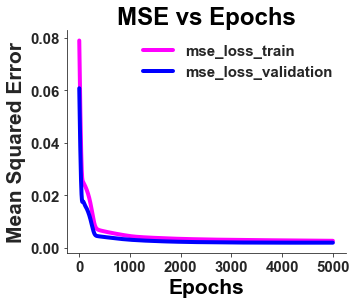

In [27]:
###############################################################################
#################   plotting graphs together - Sensitivity  ###################
###############################################################################

plt.figure(figsize=(17,9))
sns.set_style("white") 
###plt.suptitle('NanoAntenna - Sensitivity - (epochs - {})'.format(epochs), fontsize=15,
                ###color = 'k', fontweight='bold')     ## giving title on top of all subplots

plt.subplot(231)
plt.title('subplot: A') # No grid lines
ax = sns.lineplot(running_loss_index , running_loss, linewidth = 4, color = 'magenta', 
             label = str('mse_loss_train'))
sns.lineplot(running_loss_validation_index, running_loss_validation, linewidth = 4, color = 'blUE',
             label = str('mse_loss_validation'))
plt.legend(loc = 'best', fontsize = 15, frameon=False)
plt.title('MSE vs Epochs', fontsize = 24 , color = 'k', fontweight ='bold')
plt.xlabel('Epochs', fontsize = 21, color = 'k', fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize = 21 )
plt.tick_params(axis = "both", labelsize = 15 )

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

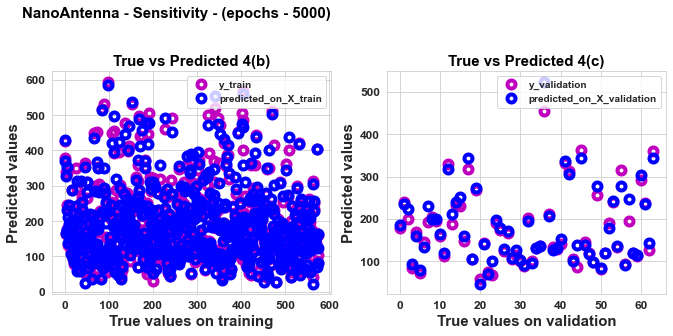

In [28]:
plt.figure(figsize=(17,9))
sns.set_style("whitegrid") 
plt.suptitle('NanoAntenna - Sensitivity - (epochs - {})'.format(epochs), fontsize=15,
         color = 'k', fontweight='bold')     ## giving title on top of all subplots


plt.subplot(232)
plt.title('subplot: B')
# Plot true data
plt.plot(B.inverse_transform(y_train)[:,0], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'y_train')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_train)[:,0], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_train')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.tick_params(axis = "both", labelsize=12)
plt.title('True vs Predicted 4(b)', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('True values on training', fontsize=15)
plt.ylabel('Predicted values', fontsize=15 )
plt.tick_params(axis = "both", labelsize=12)

# plt.figure()
plt.subplot(233)
plt.title('subplot: C')
# Plot true data
plt.plot(B.inverse_transform(y_validation)[:,0], 'mo', markersize = 8,markeredgewidth = 4,
         markerfacecolor = 'None',  label = 'y_validation')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_validation)[:,0], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_validation')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.title('True vs Predicted 4(c)', fontsize = 15, color = 'k', fontweight='bold' )
plt.xlabel('True values on validation', fontsize = 15)
plt.ylabel('Predicted values', fontsize = 15 )
plt.tick_params(axis = "both", labelsize = 12)


Text(0, 0.5, 'Sensitivity (nm/RIU) ')

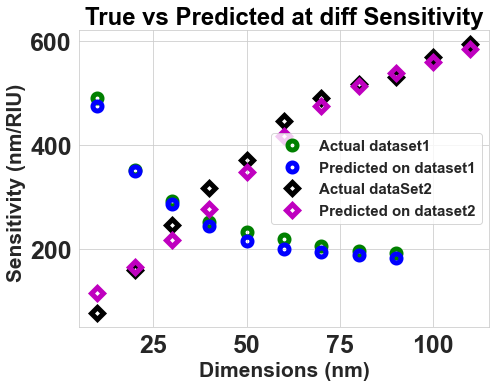

In [29]:
plt.figure(figsize=(25,12))
# plt.figure()
plt.subplot(234)
plt.title('subplot: D')
# Plot true data Dataset 1
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, B.inverse_transform(y_test)[:,0], 'go', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual dataset1')
plt.plot(x, B.inverse_transform(predicted_on_X_test)[:,0],'bo', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted on dataset1')

# Plot true data Dataset 2
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.plot(x1, B.inverse_transform(y_test1)[:,0], 'kD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label = 'Actual dataSet2')
plt.plot(x1, B.inverse_transform(predicted_on_X_test1)[:,0], 'mD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label ='Predicted on dataset2')
# Legend and plot
plt.legend(loc = 'best', fontsize = 15)
plt.tick_params(axis = "both", labelsize = 25)
plt.title('True vs Predicted at diff Sensitivity', fontsize = 24, color = 'k', fontweight ='bold' )
plt.xlabel('Dimensions (nm)', fontsize = 21, fontweight ='bold' )
plt.ylabel('Sensitivity (nm/RIU) ', fontsize = 21, fontweight ='bold' )

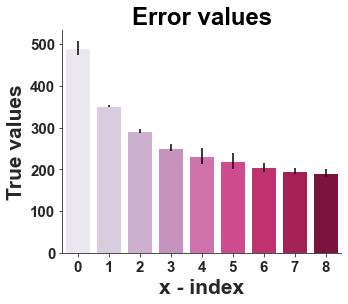

In [30]:
plt.figure(figsize=(17,9))
sns.set_style("white") 

# plt.figure()
plt.subplot(235)
plt.title('subplot: E')
true_values = B.inverse_transform(y_test)[:,0]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,0]
x_index = [i for i in range(len(true_values))] # 
yerr = error_values = predicted_values - true_values
ax = sns.barplot(x = x_index, y = true_values, yerr = error_values, palette = 'PuRd')
plt.tick_params(axis = "both", labelsize = 15)
plt.title('Error values', fontsize = 24, color = 'k', fontweight ='bold' )
plt.xlabel('x - index', fontsize = 21)
plt.ylabel('True values', fontsize = 21)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'Sensitivity (nm/RIU)')

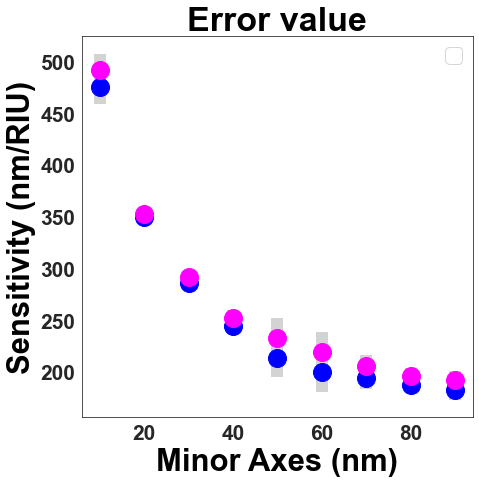

In [31]:
plt.figure(figsize= (7,7))
sns.set_style("white") 
# plt.figure()

true_values = B.inverse_transform(y_test)[:,0]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,0]
error = ((predicted_values - true_values)/predicted_values)*100

plt.errorbar(x, y = predicted_values, yerr = error_values, fmt = 'o', color = 'blue',
             ecolor = 'lightgrey', elinewidth = 12, capsize = 0, ms = 18);

plt.errorbar(x, y = true_values, yerr = error_values, fmt = 'o', color = 'magenta',
             ecolor = 'lightgrey', elinewidth = 12, capsize = 0, ms = 18);

plt.legend(loc = 'best', fontsize = 21)
plt.tick_params(axis = "both", labelsize = 21)
plt.title('Error value', fontsize=34, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=31, color = 'k', fontweight ='bold')
plt.ylabel('Sensitivity (nm/RIU)', fontsize=31, color = 'k', fontweight ='bold')


o/p of test set:           
 [491.337 352.207 291.626 252.166 232.891 219.094 205.297 195.693 191.909]
predicted o/p of test set: 
 [475.08688 349.98877 286.20108 244.4718  213.81842 199.74995 194.28769
 187.71848 182.60167]
mse_test_set:  0.0009097297753108178


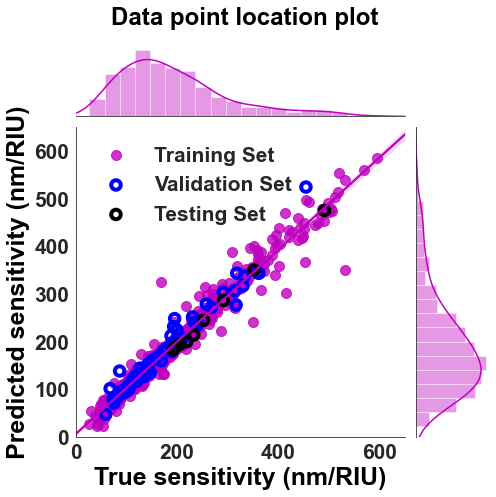

In [32]:
sns.set_style("white") 
# plt.figure()

xx = B.inverse_transform(y_train)[:,0]
yy = B.inverse_transform(predicted_on_X_train)[:,0]

xx_validation = B.inverse_transform(y_validation)[:,0]
yy_validation = B.inverse_transform(predicted_on_X_validation)[:,0]

xx_test = B.inverse_transform(y_test)[:,0]
yy_test = B.inverse_transform(predicted_on_X_test)[:,0]

axs = sns.jointplot(xx, yy, color = "m", marker ='o', kind = "reg",  scatter_kws = {"s": 100}, label = 'Training Set',
                    height = 7, ratio = 4, space=0.1)

bxs = axs.ax_joint.scatter(xx_validation, yy_validation, marker ='o', s = 90, facecolors ='none', edgecolors='b', 
                     linewidths = 4, label = 'Validation Set')

axs.ax_joint.scatter(xx_test, yy_test, marker = "o", s = 90, facecolors='none', edgecolors='k', 
                     linewidths = 4 , label = 'Testing Set')

plt.legend(loc = 'best', fontsize=21,frameon=False)
plt.xlabel('True sensitivity (nm/RIU)', fontsize=25, color = 'k', fontweight='bold' )
plt.ylabel('Predicted sensitivity (nm/RIU)', fontsize=25, color = 'k', fontweight='bold'  )
plt.tick_params(axis="both", labelsize=21)
axs.ax_marg_x.set_xlim(0, 650)
axs.ax_marg_y.set_ylim(0, 650)
axs.fig.suptitle('Data point location plot ', fontsize = 24,  color = 'k', fontweight='bold' )

axs.fig.tight_layout()
axs.fig.subplots_adjust(top = .9) 
print()
print("o/p of test set:           \n", (B.inverse_transform(y_test)[:,0]))
print("predicted o/p of test set: \n", (B.inverse_transform(predicted_on_X_test)[:,0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

#Value save
xx = pd.Series(xx)
xx.to_csv('xx_sensitivity.csv', index=False)
yy = pd.Series(yy)
yy.to_csv('yy_sensitivity.csv', index=False)

xx_validation = pd.Series(xx_validation)
xx_validation.to_csv('xx_validation_sensitivity.csv', index=False)
yy_validation = pd.Series(yy_validation)
yy_validation.to_csv('yy_validation_sensitivity.csv', index=False)

xx_test = pd.Series(xx_test)
xx_test.to_csv('xx_test_sensitivity.csv', index=False)
yy_test = pd.Series(yy_test)
yy_test.to_csv('yy_test_sensitivity.csv', index=False)

Text(0, 0.5, 'Sensitivity (nm/RIU)')

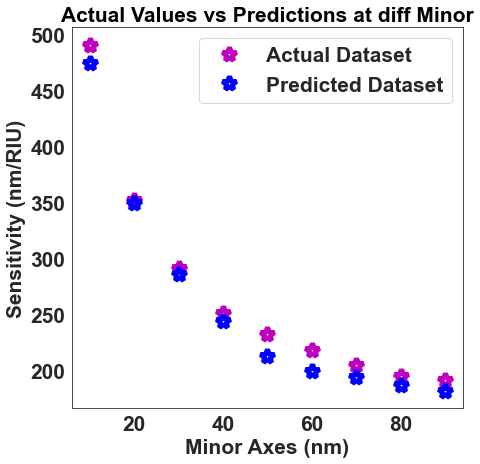

In [33]:
plt.figure(figsize=(7,7))
sns.set_style("white") 
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, xx_test, 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x, yy_test,'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')
plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis = "both", labelsize=21)
plt.title('Actual Values vs Predictions at diff Minor', fontsize=21, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=21)
plt.ylabel('Sensitivity (nm/RIU)', fontsize = 21)

Text(0, 0.5, 'Sensitivity (nm/RIU)')

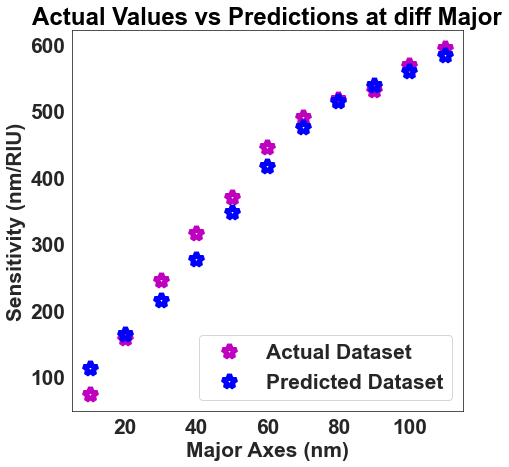

In [34]:
plt.figure(figsize=(7,7))

sns.set_style("white")
x1 = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
xx_test1 = B.inverse_transform(y_test1)[:,0]
yy_test1 = B.inverse_transform(predicted_on_X_test1)[:,0]

plt.plot(x1, xx_test1, 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x1, yy_test1,'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')

plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis="both", labelsize = 21)
plt.title('Actual Values vs Predictions at diff Major', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Major Axes (nm)', fontsize = 21)
plt.ylabel('Sensitivity (nm/RIU)', fontsize = 21)

Text(0, 0.5, 'Sensitivity (nm/RIU)')

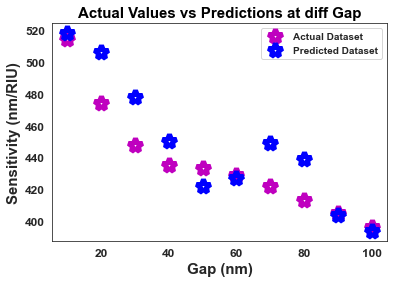

In [35]:
xx_test2 = scaler2.inverse_transform(predicted_on_X_test2)[:,0]
yy_test2 = B.inverse_transform(y_test2)[:,0]
x2 = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, xx_test2, 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x2, yy_test2,'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')

plt.legend(loc = 'best', fontsize=10)
plt.tick_params(axis = "both", labelsize = 12)
plt.title('Actual Values vs Predictions at diff Gap', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('Gap (nm)', fontsize = 15)
plt.ylabel('Sensitivity (nm/RIU)', fontsize = 15)

In [36]:
#print(yy)
x_Sensitivity = pd.Series(B.inverse_transform(y_test)[:,0])
x_Sensitivity.to_csv('xx_Minor_Axes_Sensitivity_5000.csv', index=False)
y_Sensitivity = pd.Series(B.inverse_transform(predicted_on_X_test)[:,0])
y_Sensitivity.to_csv('yy_Minor_Axes_Sensitivity_5000.csv', index=False)
print(type(x_Sensitivity))
type(y_Sensitivity)
#print(yy)
x1_Sensitivity = pd.Series(xx_test1)
x1_Sensitivity.to_csv('xx_Major_Axes_Sensitivity_5000.csv', index=False)
y1_Sensitivity = pd.Series(yy_test1)
y1_Sensitivity.to_csv('yy_Major_Axes_Sensitivity_5000.csv', index=False)
type(y1_Sensitivity)

<class 'pandas.core.series.Series'>


pandas.core.series.Series

In [37]:
xx_Sensitivity = pd.Series(B.inverse_transform(y_train)[:,0])
xx_Sensitivity.to_csv('y_train_Sensitivity_5000.csv', index=False)

yy_Sensitivity = pd.Series(B.inverse_transform(predicted_on_X_train)[:,0])
yy_Sensitivity.to_csv('predicted_on_X_train_Sensitivity_5000.csv', index=False)

xx_validation_Sensitivity = pd.Series(B.inverse_transform(y_validation)[:,0])
xx_validation_Sensitivity.to_csv('y_validation__Sensitivity_5000.csv', index=False) 

yy_validation_Sensitivity = pd.Series(B.inverse_transform(predicted_on_X_validation)[:,0])
yy_validation_Sensitivity.to_csv('predicted_on_X_validation_Sensitivity_5000.csv', index=False)

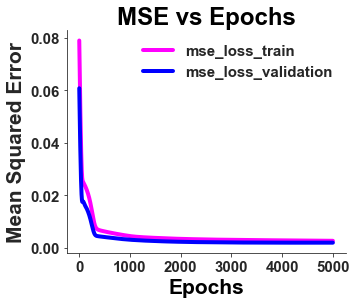

In [38]:
###############################################################################
#################   plotting graphs together - FWHM  ###################
###############################################################################

plt.figure(figsize=(17,9))
sns.set_style("white") 
###plt.suptitle('NanoAntenna - FWHM - (epochs - {})'.format(epochs), fontsize=15,
                ###color = 'k', fontweight='bold')     ## giving title on top of all subplots

plt.subplot(231)
plt.title('subplot: A') # No grid lines
ax = sns.lineplot(running_loss_index , running_loss, linewidth = 4, color = 'magenta', 
             label = str('mse_loss_train'))
sns.lineplot(running_loss_validation_index, running_loss_validation, linewidth = 4, color = 'blUE',
             label = str('mse_loss_validation'))
plt.legend(loc = 'best', fontsize = 15, frameon=False)
plt.title('MSE vs Epochs', fontsize = 24 , color = 'k', fontweight ='bold')
plt.xlabel('Epochs', fontsize = 21, color = 'k', fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize = 21 )
plt.tick_params(axis = "both", labelsize = 15 )

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


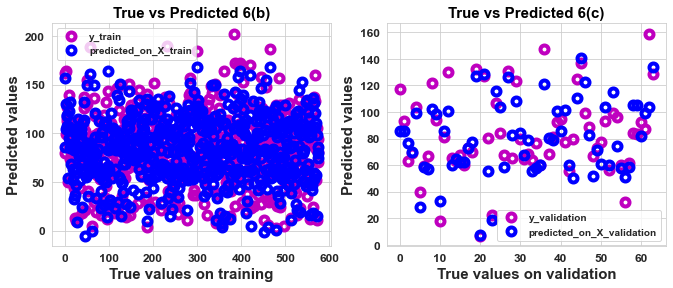

In [39]:

plt.figure(figsize=(17,9))
sns.set_style("whitegrid") 

plt.subplot(232)
plt.title('subplot: B')
# Plot true data
plt.plot(B.inverse_transform(y_train)[:,1], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'y_train')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_train)[:,1], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_train')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.tick_params(axis = "both", labelsize=12)
plt.title('True vs Predicted 6(b)', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('True values on training', fontsize=15)
plt.ylabel('Predicted values', fontsize=15 )
plt.tick_params(axis = "both", labelsize=12)


# plt.figure()
plt.subplot(233)
plt.title('subplot: C')
# Plot true data
plt.plot(B.inverse_transform(y_validation)[:,1], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None',  label = 'y_validation')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_validation)[:,1], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_validation')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.title('True vs Predicted 6(c)', fontsize = 15, color = 'k', fontweight='bold' )
plt.xlabel('True values on validation', fontsize = 15)
plt.ylabel('Predicted values', fontsize = 15 )
plt.tick_params(axis = "both", labelsize = 12)

Text(0, 0.5, 'FWHM (nm) ')

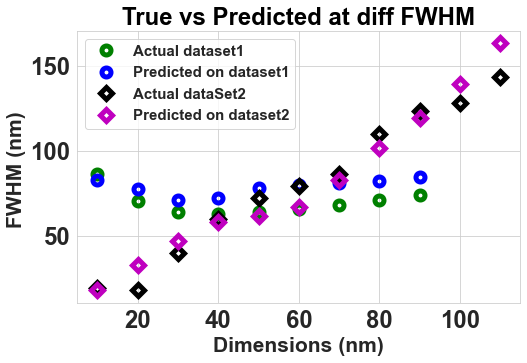

In [40]:
plt.figure(figsize= (27,11))
# plt.figure()
plt.subplot(234)
plt.title('subplot: D')
# Plot true data Dataset 1
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, B.inverse_transform(y_test)[:,1], 'go', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual dataset1')
plt.plot(x, B.inverse_transform(predicted_on_X_test)[:,1],'bo', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted on dataset1')

# Plot true data Dataset 2
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.plot(x1, B.inverse_transform(y_test1)[:,1], 'kD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label = 'Actual dataSet2')
plt.plot(x1, B.inverse_transform(predicted_on_X_test1)[:,1], 'mD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label ='Predicted on dataset2')
# Legend and plot

plt.legend(loc = 'best', fontsize=15)
plt.tick_params(axis="both", labelsize=24)
plt.title('True vs Predicted at diff FWHM', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Dimensions (nm)', fontsize=21)
plt.ylabel('FWHM (nm) ', fontsize = 21)

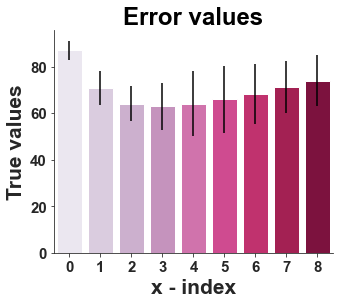

In [41]:
plt.figure(figsize=(17,9))
sns.set_style("white") 

# plt.figure()
plt.subplot(235)
plt.title('subplot: E')
true_values = B.inverse_transform(y_test)[:,1]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,1]
x_index = [i for i in range(len(true_values))] # 
yerr = error_values = predicted_values - true_values
ax = sns.barplot(x = x_index, y = true_values, yerr = error_values, palette = 'PuRd')
plt.tick_params(axis = "both", labelsize = 15)
plt.title('Error values', fontsize = 24, color = 'k', fontweight ='bold' )
plt.xlabel('x - index', fontsize = 21)
plt.ylabel('True values', fontsize = 21)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'FWHM (nm)')

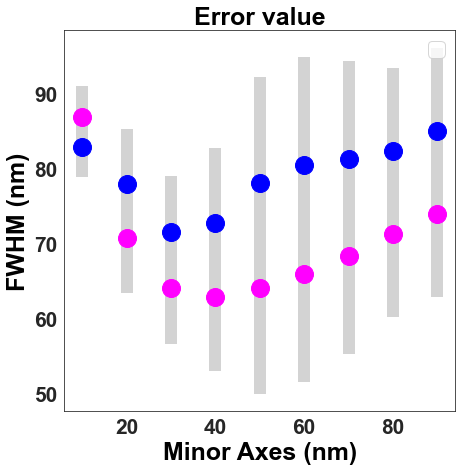

In [42]:
# plt.figure()
plt.figure(figsize= (7,7))
sns.set_style("white")
true_values = B.inverse_transform(y_test)[:,1]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,1]
error = ((predicted_values - true_values)/predicted_values)*100
plt.errorbar(x, y = predicted_values, yerr = error_values, fmt = 'o', color = 'blue',
             ecolor = 'lightgrey', linewidth = 12, capsize = 0, ms = 18);

plt.errorbar(x, y = true_values, yerr = error_values, fmt = 'o', color = 'magenta',
             ecolor = 'lightgrey', linewidth = 12, capsize = 0, ms = 18);

plt.legend(loc = 'best', fontsize = 21)
plt.tick_params(axis = "both", labelsize = 21)
plt.title('Error value', fontsize=25, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=25, color = 'k', fontweight ='bold' )
plt.ylabel('FWHM (nm)', fontsize=25, color = 'k', fontweight ='bold')

No handles with labels found to put in legend.


11
11
11
11


(-10.0, 120.0)

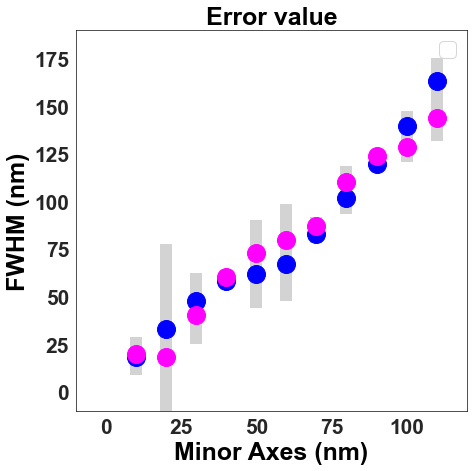

In [43]:
# plt.figure()
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.figure(figsize= (7,7))
sns.set_style("white")
true_values1 = B.inverse_transform(y_test1)[:,1]
predicted_values1 = B.inverse_transform(predicted_on_X_test1)[:,1]
error = ((predicted_values1 - true_values1)/predicted_values1)*100
print(len(error))
print(len(predicted_values1))
print(len(x))
print(len(error))

plt.errorbar(x, y = predicted_values1, yerr = error, fmt = 'o', color = 'blue',
             ecolor = 'lightgrey', linewidth = 12, capsize = 0, ms = 18);

plt.errorbar(x, y = true_values1, yerr = error, fmt = 'o', color = 'magenta',
             ecolor = 'lightgrey', linewidth = 12, capsize = 0, ms = 18);

plt.legend(loc = 'best', fontsize = 21)
plt.tick_params(axis = "both", labelsize = 21)
plt.title('Error value', fontsize=25, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=25, color = 'k', fontweight ='bold' )
plt.ylabel('FWHM (nm)', fontsize=25, color = 'k', fontweight ='bold')


plt.gca().set_ylim(-10, 190)
plt.gca().set_xlim(-10, 120)


o/p of test set:           
 [491.337 352.207 291.626 252.166 232.891 219.094 205.297 195.693 191.909]
predicted o/p of test set: 
 [475.08688 349.98877 286.20108 244.4718  213.81842 199.74995 194.28769
 187.71848 182.60167]
mse_test_set:  0.0009097297753108178


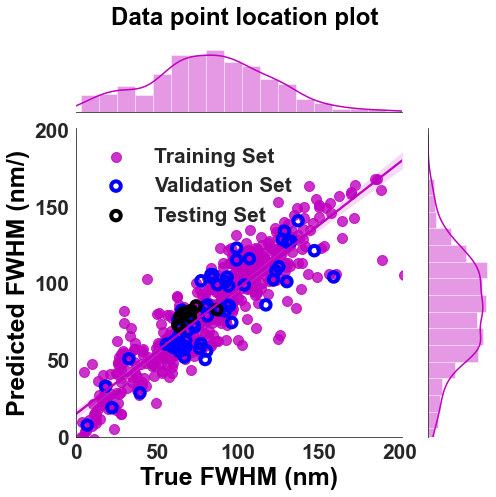

In [44]:
sns.set_style("white") 
# plt.figure()

xx = B.inverse_transform(y_train)[:,1]
yy = B.inverse_transform(predicted_on_X_train)[:,1]

xx_validation = B.inverse_transform(y_validation)[:,1]
yy_validation = B.inverse_transform(predicted_on_X_validation)[:,1]

xx_test = B.inverse_transform(y_test)[:,1]
yy_test = B.inverse_transform(predicted_on_X_test)[:,1]

axs = sns.jointplot(xx, yy, color = "m", marker ='o', kind = "reg",  scatter_kws = {"s": 100}, label = 'Training Set',
                    height = 7, ratio = 4, space=0.1)

bxs = axs.ax_joint.scatter(xx_validation, yy_validation, marker ='o', s = 90, facecolors ='none', edgecolors='b', 
                     linewidths = 4, label = 'Validation Set')

axs.ax_joint.scatter(xx_test, yy_test, marker = "o", s = 90, facecolors='none', edgecolors='k', 
                     linewidths = 4 , label = 'Testing Set')

plt.legend(loc = 'best', fontsize=21,frameon=False)
plt.xlabel('True FWHM (nm)', fontsize=25, color = 'k', fontweight='bold' )
plt.ylabel('Predicted FWHM (nm/)', fontsize=25, color = 'k', fontweight='bold'  )
plt.tick_params(axis="both", labelsize=21)
axs.ax_marg_x.set_xlim(0, 201)
axs.ax_marg_y.set_ylim(0, 201)
axs.fig.suptitle('Data point location plot ', fontsize = 24,  color = 'k', fontweight='bold' )

axs.fig.tight_layout()
axs.fig.subplots_adjust(top = .9) 
print()
print("o/p of test set:           \n", (B.inverse_transform(y_test)[:,0]))
print("predicted o/p of test set: \n", (B.inverse_transform(predicted_on_X_test)[:,0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

#Value save
xx = pd.Series(xx)
xx.to_csv('xx_FWHM.csv', index=False)
yy = pd.Series(yy)
yy.to_csv('yy_FWHM.csv', index=False)

xx_validation = pd.Series(xx_validation)
xx_validation.to_csv('xx_validation_FWHM.csv', index=False)
yy_validation = pd.Series(yy_validation)
yy_validation.to_csv('yy_validation_FWHM.csv', index=False)

xx_test = pd.Series(xx_test)
xx_test.to_csv('xx_test_FWHM.csv', index=False)
yy_test = pd.Series(yy_test)
yy_test.to_csv('yy_test_FWHM.csv', index=False)

Text(0, 0.5, 'FWHM (nm)')

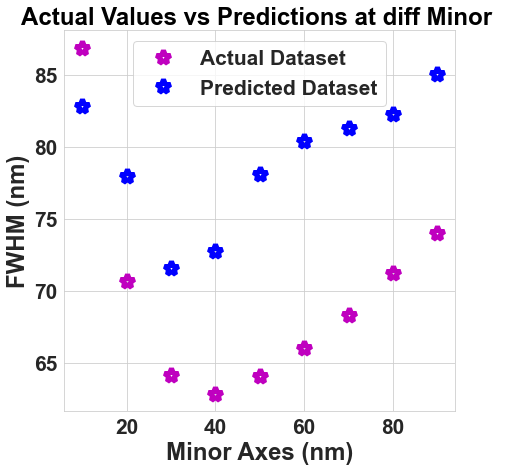

In [45]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid") 

x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, B.inverse_transform(y_test)[:,1], 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x, B.inverse_transform(predicted_on_X_test)[:,1],'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')
plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis="both", labelsize=21)
plt.title('Actual Values vs Predictions at diff Minor ', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=24)
plt.ylabel('FWHM (nm)', fontsize = 24)

Text(0, 0.5, 'FWHM (nm)')

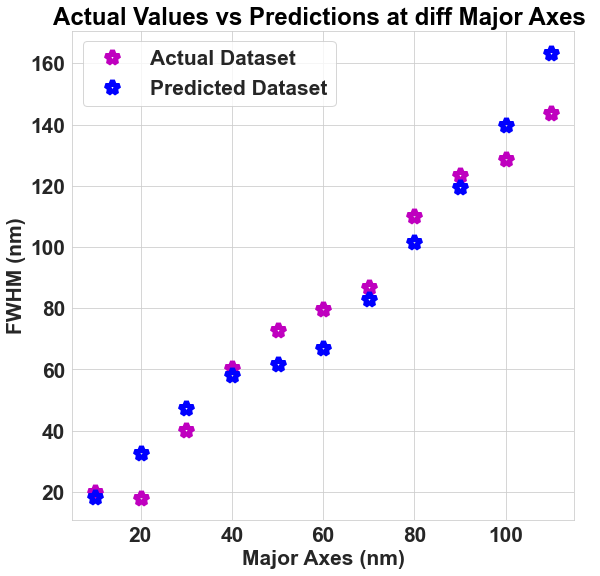

In [46]:
plt.figure(figsize=(9,9))
sns.set_style("whitegrid") 

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.plot(x, B.inverse_transform(y_test1)[:,1], 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x, B.inverse_transform(predicted_on_X_test1)[:,1],'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')
plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis="both", labelsize=21)
plt.title('Actual Values vs Predictions at diff Major Axes ', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Major Axes (nm)', fontsize=21)
plt.ylabel('FWHM (nm)', fontsize=21)

Text(0, 0.5, 'FWHM (nm)')

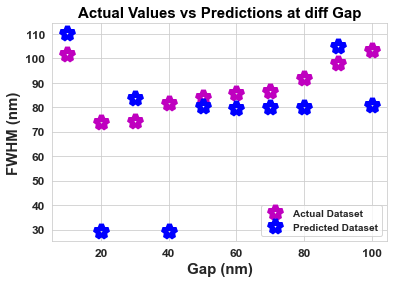

In [47]:
xx_test2 = scaler2.inverse_transform(predicted_on_X_test2)[:,1]
yy_test2 = B.inverse_transform(y_test2)[:,1]
x2 = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, xx_test2, 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x2, yy_test2,'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')

plt.legend(loc = 'best', fontsize=10)
plt.tick_params(axis = "both", labelsize = 12)
plt.title('Actual Values vs Predictions at diff Gap', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('Gap (nm)', fontsize = 15)
plt.ylabel('FWHM (nm)', fontsize = 15)

In [48]:
#print(yy)
x_FWHM = pd.Series(B.inverse_transform(y_test)[:,1])
x_FWHM.to_csv('xx_Minor_Axes_FWHM_5000.csv', index=False)
y_FWHM = pd.Series(B.inverse_transform(predicted_on_X_test)[:,1])
y_FWHM.to_csv('yy_Minor_Axes_FWHM_5000.csv', index=False)
print(x_FWHM)
#print(yy)
x1_FWHM = pd.Series(B.inverse_transform(y_test1)[:,1])
x1_FWHM.to_csv('xx_Major_Axes_FWHM_5000.csv', index=False)
y1_FWHM = pd.Series(B.inverse_transform(predicted_on_X_test1)[:,1],)
y1_FWHM.to_csv('yy_Major_Axes_FWHM_5000.csv', index=False)
print(x1_FWHM)

0    86.91014
1    70.66833
2    64.11593
3    62.84895
4    64.06278
5    65.97941
6    68.28955
7    71.21921
8    73.98695
dtype: float64
0      19.879502
1      18.158348
2      40.247600
3      60.322260
4      72.750820
5      79.711740
6      86.910140
7     110.179760
8     123.659450
9     128.622470
10    143.856640
dtype: float64


In [49]:
xx_FWHM = pd.Series(B.inverse_transform(y_train)[:,1])
xx_FWHM.to_csv('y_train_FWHM_5000.csv', index=False)

yy_FWHM = pd.Series(B.inverse_transform(predicted_on_X_train)[:,1])
yy_FWHM.to_csv('predicted_on_X_train_FWHM_5000.csv', index=False)

xx_validation_FWHM = pd.Series(B.inverse_transform(y_validation)[:,1])
xx_validation_FWHM.to_csv('y_validation__FWHM_5000.csv', index=False) 

yy_validation_FWHM = pd.Series(B.inverse_transform(predicted_on_X_validation)[:,1])
yy_validation_FWHM.to_csv('predicted_on_X_validation_FWHM_5000.csv', index=False)


o/p of test set:           
 [491.337 352.207 291.626 252.166 232.891 219.094 205.297 195.693 191.909]
predicted o/p of test set: 
 [475.08688 349.98877 286.20108 244.4718  213.81842 199.74995 194.28769
 187.71848 182.60167]
mse_test_set:  0.0009097297753108178


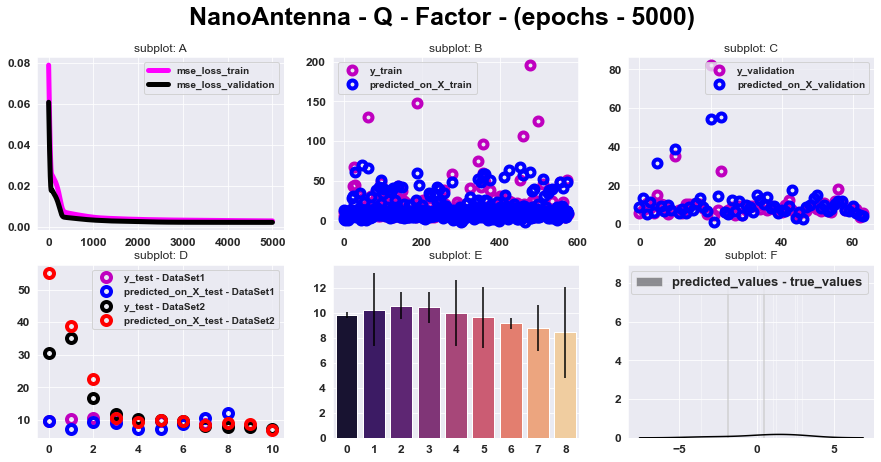

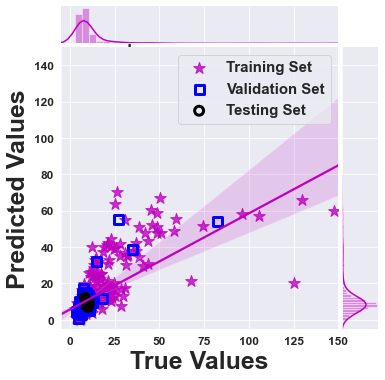

In [50]:
#####################################################################################
#################   plotting graphs together - Q - Factor  ################
#####################################################################################

plt.figure(figsize=(15,7))
sns.set_style("darkgrid") 
plt.suptitle('NanoAntenna - Q - Factor - (epochs - {})'.format(epochs), fontsize=25,
                color = 'k', fontweight='bold')     ## giving title on top of all subplots

plt.subplot(231)
plt.title('subplot: A') # No grid lines
sns.lineplot(running_loss_index , running_loss, linewidth = 5, color = 'magenta', label = str('mse_loss_train'))
sns.lineplot(running_loss_validation_index, running_loss_validation, linewidth = 5, color = 'black', 
             label=str('mse_loss_validation'))
plt.legend(loc = 'best', fontsize = 10)
plt.tick_params(axis="both", labelsize=12)

plt.subplot(232)
plt.title('subplot: B')
# Plot true data
plt.plot(B.inverse_transform(y_train)[:,2], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'y_train')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_train)[:,2], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label='predicted_on_X_train')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.tick_params(axis="both", labelsize=12)

# plt.figure()
plt.subplot(233)
plt.title('subplot: C')
# Plot true data
plt.plot(B.inverse_transform(y_validation)[:,2], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label='y_validation')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_validation)[:,2], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)
plt.tick_params(axis="both", labelsize=12)

# plt.figure()
plt.subplot(234)
plt.title('subplot: D')
# Plot true data Dataset 1
plt.plot(B.inverse_transform(y_test)[:,2], 'mo', markersize = 9, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'y_test - DataSet1')
plt.plot(B.inverse_transform(predicted_on_X_test)[:,2],'bo', markersize = 9, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_test - DataSet1')

# Plot true data Dataset 2
plt.plot(B.inverse_transform(y_test1)[:,2], 'ko', markersize = 9, markeredgewidth = 4,
         markerfacecolor = 'None',label = 'y_test - DataSet2')
plt.plot(B.inverse_transform(predicted_on_X_test1)[:,2], 'ro', markersize = 9, markeredgewidth = 4,
         markerfacecolor = 'None',label ='predicted_on_X_test - DataSet2')

plt.legend(loc='best', fontsize=10)
plt.tick_params(axis="both", labelsize=12)

# plt.figure()
plt.subplot(235)
plt.title('subplot: E')
true_values = B.inverse_transform(y_test)[:,2]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,2]
x_index = [i for i in range(len(true_values))]
yerr = error_values = predicted_values - true_values
sns.barplot(x = x_index, y = true_values, yerr = error_values, palette ="magma")
plt.tick_params(axis="both", labelsize=12)


# plt.figure()
plt.subplot(236)
plt.title('subplot: F')
true_values = B.inverse_transform(y_test)[:,2]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,2]
sns.distplot((-predicted_values + true_values), bins = 500, color = 'k', fit_kws = dict(linewidth = 5.5), 
             label = 'predicted_values - true_values');
plt.legend(loc = 'best', fontsize=13)
plt.tick_params(axis="both", labelsize=12)

# plt.figure()
xx = abs(B.inverse_transform(y_train)[:,2])
yy = abs(B.inverse_transform(predicted_on_X_train)[:,2])
xx_validation = abs(B.inverse_transform(y_validation)[:,2])
yy_validation = abs(B.inverse_transform(predicted_on_X_validation)[:,2])

xx_test = abs(B.inverse_transform(y_test)[:,2])
yy_test = abs(B.inverse_transform(predicted_on_X_test)[:,2])

axs = sns.jointplot(xx, yy, color ="m", marker = "*", kind = "reg",  scatter_kws={"s": 150}, label='Training Set',
                    height=5, ratio = 7, space=0.1)
bxs = axs.ax_joint.scatter(xx_validation, yy_validation, marker ='s', s = 80, facecolors ='none', edgecolors='b', 
                     linewidths = 3, label = 'Validation Set')
axs.ax_joint.scatter(xx_test, yy_test, marker = "o", s = 80, facecolors='none', edgecolors='k', 
                     linewidths = 3 , label='Testing Set')
plt.legend(loc = 'best', fontsize=15,)
plt.title('Data point Location Plot', fontsize=25 )
plt.xlabel('True Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25 )
plt.tick_params(axis="both", labelsize=12)
axs.ax_marg_x.set_xlim(-5, 150)
axs.ax_marg_y.set_ylim(-5, 150)


print()
print("o/p of test set:           \n", (B.inverse_transform(y_test)[:,0]))
print("predicted o/p of test set: \n", (B.inverse_transform(predicted_on_X_test)[:,0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

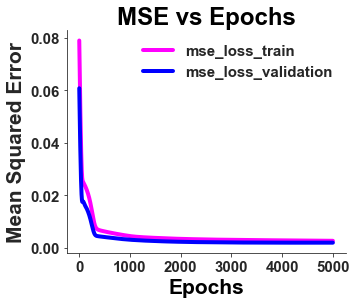

In [51]:
###############################################################################
#################   plotting graphs together - Plasmonic Wavelength ###################
###############################################################################

plt.figure(figsize=(17,9))
sns.set_style("white") 
###plt.suptitle('NanoAntenna - Plasmonic Wavelength  - (epochs - {})'.format(epochs), fontsize=15,
                ###color = 'k', fontweight='bold')     ## giving title on top of all subplots

plt.subplot(231)
plt.title('subplot: A') # No grid lines
ax = sns.lineplot(running_loss_index , running_loss, linewidth = 4, color = 'magenta', 
             label = str('mse_loss_train'))
sns.lineplot(running_loss_validation_index, running_loss_validation, linewidth = 4, color = 'blUE',
             label = str('mse_loss_validation'))
plt.legend(loc = 'best', fontsize = 15, frameon=False)
plt.title('MSE vs Epochs', fontsize = 24 , color = 'k', fontweight ='bold')
plt.xlabel('Epochs', fontsize = 21, color = 'k', fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize = 21 )
plt.tick_params(axis = "both", labelsize = 15 )

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


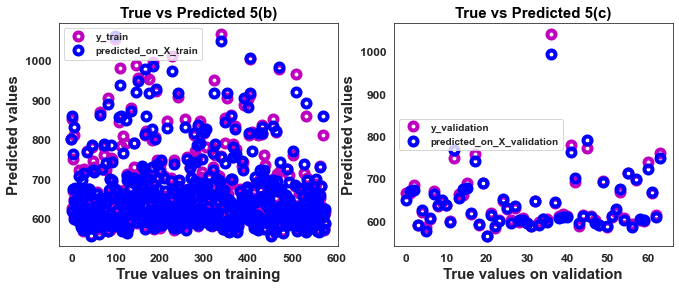

In [52]:

plt.figure(figsize=(17,9))
sns.set_style("white") 
plt.subplot(232)
plt.title('subplot: B')
# Plot true data
plt.plot(B.inverse_transform(y_train)[:,3], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'y_train')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_train)[:,3], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_train')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.tick_params(axis = "both", labelsize=12)
plt.title('True vs Predicted 5(b)', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('True values on training', fontsize=15)
plt.ylabel('Predicted values', fontsize=15 )
plt.tick_params(axis = "both", labelsize=12)


# plt.figure()
plt.subplot(233)
plt.title('subplot: C')
# Plot true data
plt.plot(B.inverse_transform(y_validation)[:,3], 'mo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None',  label = 'y_validation')
# Plot predictions
plt.plot(B.inverse_transform(predicted_on_X_validation)[:,3], 'bo', markersize = 8, markeredgewidth = 4,
         markerfacecolor = 'None', label = 'predicted_on_X_validation')
# Legend and plot
plt.legend(loc = 'best', fontsize = 10)
plt.title('True vs Predicted 5(c)', fontsize = 15, color = 'k', fontweight = 'bold' )
plt.xlabel('True values on validation', fontsize = 15)
plt.ylabel('Predicted values', fontsize = 15 )
plt.tick_params(axis = "both", labelsize = 12)

Text(0, 0.5, 'Plasmonic wavelength(nm) ')

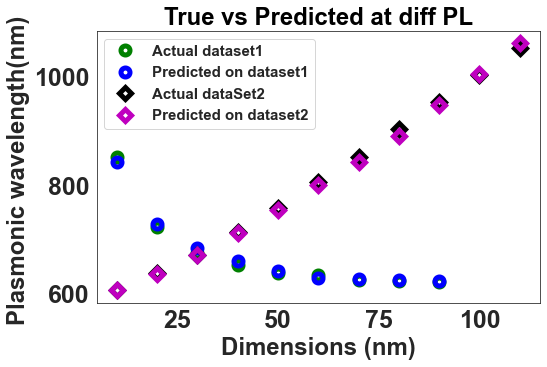

In [53]:
plt.figure(figsize= (27,11))
# plt.figure()
plt.subplot(234)
plt.title('subplot: D')
# Plot true data Dataset 1
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, B.inverse_transform(y_test)[:,3], 'go', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual dataset1')
plt.plot(x, B.inverse_transform(predicted_on_X_test)[:,3],'bo', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted on dataset1')

# Plot true data Dataset 2
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.plot(x1, B.inverse_transform(y_test1)[:,3], 'kD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label = 'Actual dataSet2')
plt.plot(x1, B.inverse_transform(predicted_on_X_test1)[:,3], 'mD', markersize = 9, markeredgewidth = 5,
         markerfacecolor = 'None',label ='Predicted on dataset2')
# Legend and plot

plt.legend(loc = 'best', fontsize=15)
plt.tick_params(axis="both", labelsize=25)
plt.title('True vs Predicted at diff PL', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Dimensions (nm)', fontsize=24)
plt.ylabel('Plasmonic wavelength(nm) ', fontsize = 24)

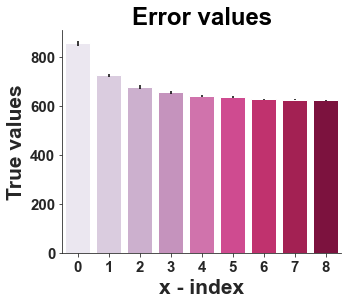

In [54]:
plt.figure(figsize=(17,9))
sns.set_style("white") 

# plt.figure()
plt.subplot(235)
plt.title('subplot: E')
true_values = B.inverse_transform(y_test)[:,3]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,3]
x_index = [i for i in range(len(true_values))] # 
yerr = error_values = predicted_values - true_values
ax = sns.barplot(x = x_index, y = true_values, yerr = error_values, palette = 'PuRd')
plt.tick_params(axis = "both", labelsize = 15)
plt.title('Error values', fontsize = 24, color = 'k', fontweight ='bold' )
plt.xlabel('x - index', fontsize = 21)
plt.ylabel('True values', fontsize = 21)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'Plasmonic wavelength (nm)')

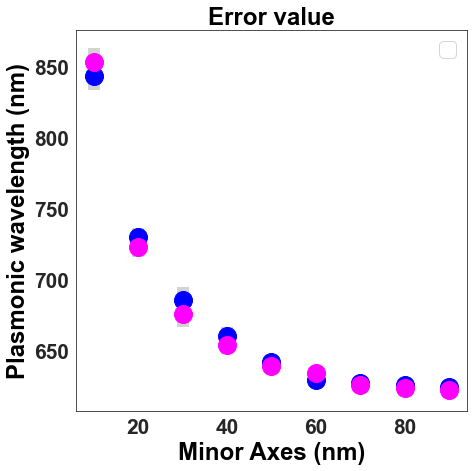

In [55]:
plt.figure(figsize= (7,7))
# plt.figure()

true_values = B.inverse_transform(y_test)[:,3]
predicted_values = B.inverse_transform(predicted_on_X_test)[:,3]
error = ((predicted_values - true_values)/predicted_values)*100
plt.errorbar(x, y = predicted_values, yerr = error_values, fmt = 'o', color = 'blue',
             ecolor = 'lightgrey', elinewidth = 12, capsize = 0, ms = 18);

plt.errorbar(x, y = true_values, yerr = error_values, fmt = 'o', color = 'magenta',
             ecolor = 'lightgrey', elinewidth = 12, capsize = 0, ms = 18);

plt.legend(loc = 'best', fontsize = 21)
plt.tick_params(axis = "both", labelsize = 21)
plt.title('Error value', fontsize = 24, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize = 24, color = 'k', fontweight ='bold')
plt.ylabel('Plasmonic wavelength (nm)', fontsize = 24, color = 'k', fontweight ='bold')


o/p of test set:           
 [853.55068 723.01485 676.01679 654.19626 639.08974 634.05423 625.66172
 623.98321 622.30471]
predicted o/p of test set: 
 [843.7011  729.84534 685.5797  660.58856 641.99567 629.40186 626.9615
 625.66016 624.6947 ]
mse_test_set:  0.0009097297753108178


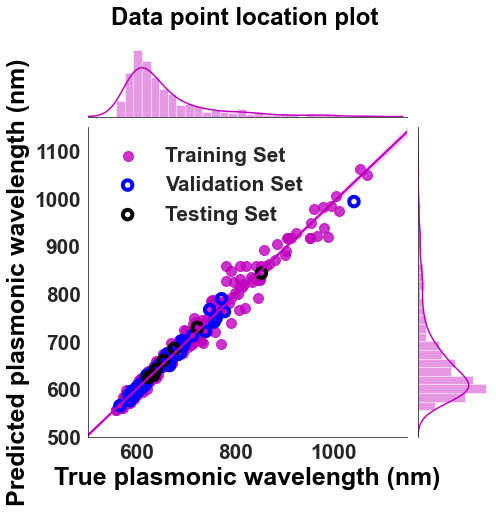

In [56]:
sns.set_style("white") 
# plt.figure()

xx = B.inverse_transform(y_train)[:,3]
yy = B.inverse_transform(predicted_on_X_train)[:,3]

xx_validation = B.inverse_transform(y_validation)[:,3]
yy_validation = B.inverse_transform(predicted_on_X_validation)[:,3]

xx_test = B.inverse_transform(y_test)[:,3]
yy_test = B.inverse_transform(predicted_on_X_test)[:,3]

axs = sns.jointplot(xx, yy, color = "m", marker ='o', kind = "reg",  scatter_kws = {"s": 100}, label = 'Training Set',
                    height = 7, ratio = 4, space=0.1)

bxs = axs.ax_joint.scatter(xx_validation, yy_validation, marker ='o', s = 90, facecolors ='none', edgecolors='b', 
                     linewidths = 4, label = 'Validation Set')

axs.ax_joint.scatter(xx_test, yy_test, marker = "o", s = 90, facecolors='none', edgecolors='k', 
                     linewidths = 4 , label = 'Testing Set')

plt.legend(loc = 'best', fontsize=21,frameon=False)
plt.xlabel('True plasmonic wavelength (nm)', fontsize=25, color = 'k', fontweight='bold' )
plt.ylabel('Predicted plasmonic wavelength (nm)', fontsize=25, color = 'k', fontweight='bold'  )
plt.tick_params(axis="both", labelsize=21)
axs.ax_marg_x.set_xlim(500, 1150)
axs.ax_marg_y.set_ylim(500, 1150)
axs.fig.suptitle('Data point location plot ', fontsize = 24,  color = 'k', fontweight='bold' )

axs.fig.tight_layout()
axs.fig.subplots_adjust(top = .9) 
print()
print("o/p of test set:           \n", (B.inverse_transform(y_test)[:,3]))
print("predicted o/p of test set: \n", (B.inverse_transform(predicted_on_X_test)[:,3]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))

#Value save
xx = pd.Series(xx)
xx.to_csv('xx_pl.csv', index=False)
yy = pd.Series(yy)
yy.to_csv('yy_pl.csv', index=False)

xx_validation = pd.Series(xx_validation)
xx_validation.to_csv('xx_validation_pl.csv', index=False)
yy_validation = pd.Series(yy_validation)
yy_validation.to_csv('yy_validation_pl.csv', index=False)

xx_test = pd.Series(xx_test)
xx_test.to_csv('xx_test_pl.csv', index=False)
yy_test = pd.Series(yy_test)
yy_test.to_csv('yy_test_pl.csv', index=False)

Text(0, 0.5, 'Plasmonic Wavelength(nm)')

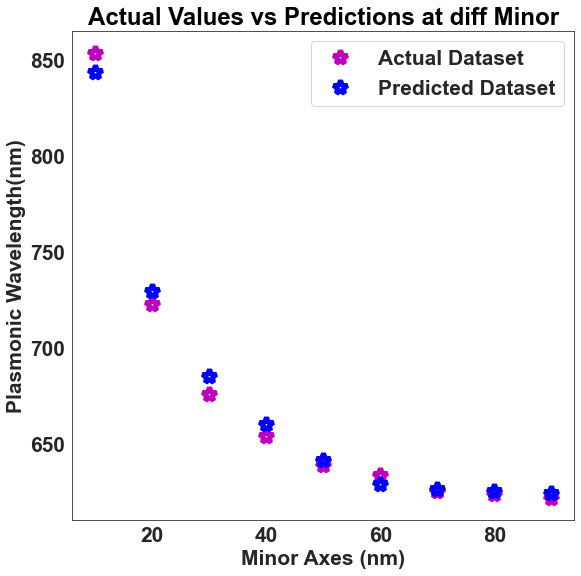

In [57]:
plt.figure(figsize= (9,9))

x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.plot(x, B.inverse_transform(y_test)[:,3], 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x, B.inverse_transform(predicted_on_X_test)[:,3],'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')
plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis="both", labelsize=21)
plt.title('Actual Values vs Predictions at diff Minor', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Minor Axes (nm)', fontsize=21)
plt.ylabel('Plasmonic Wavelength(nm)', fontsize=21)

Text(0, 0.5, 'Plasmonic Wavelength(nm)')

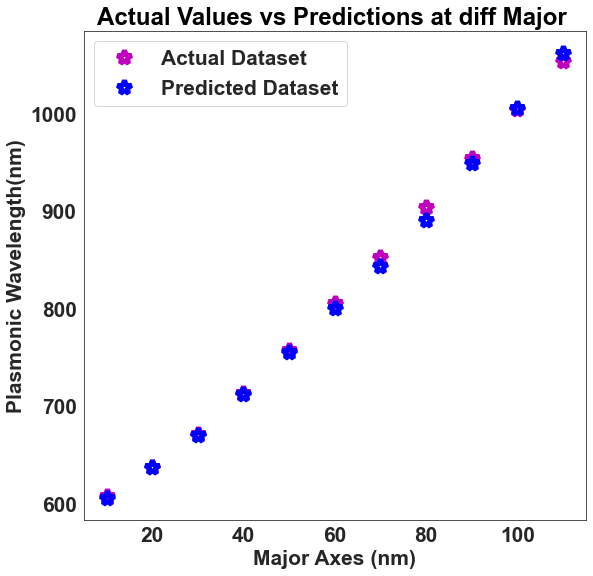

In [58]:

plt.figure(figsize= (9,9))
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.plot(x, B.inverse_transform(y_test1)[:,3], 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x, B.inverse_transform(predicted_on_X_test1)[:,3],'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')
plt.legend(loc = 'best', fontsize=21)
plt.tick_params(axis="both", labelsize=21)
plt.title('Actual Values vs Predictions at diff Major ', fontsize=24, color = 'k', fontweight ='bold' )
plt.xlabel('Major Axes (nm)', fontsize=21)
plt.ylabel('Plasmonic Wavelength(nm)', fontsize=21)

Text(0, 0.5, 'Plasmonics Wvelength (nm)')

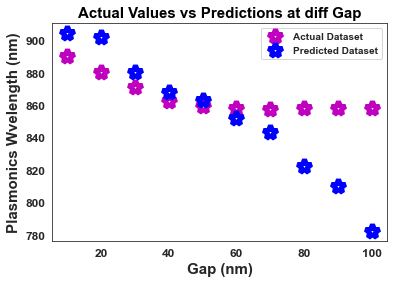

In [59]:
xx_test2 = scaler2.inverse_transform(predicted_on_X_test2)[:,3]
yy_test2 = B.inverse_transform(y_test2)[:,3]
x2 = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, xx_test2, 'm*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Actual Dataset')
plt.plot(x2, yy_test2,'b*', markersize = 15, markeredgewidth = 5,
         markerfacecolor = 'None', label = 'Predicted Dataset')

plt.legend(loc = 'best', fontsize=10)
plt.tick_params(axis = "both", labelsize = 12)
plt.title('Actual Values vs Predictions at diff Gap', fontsize=15, color = 'k', fontweight ='bold' )
plt.xlabel('Gap (nm)', fontsize = 15)
plt.ylabel('Plasmonics Wvelength (nm)', fontsize = 15)

In [60]:
#print(xx)
x_Plasmonic_Wavelength = pd.Series(B.inverse_transform(y_test)[:,3])
x_Plasmonic_Wavelength.to_csv('xx_Minor_Axes_Plasmonic_Wavelength_5000.csv', index=False)
y_Plasmonic_Wavelength = pd.Series(B.inverse_transform(predicted_on_X_test)[:,3])
y_Plasmonic_Wavelength.to_csv('yy_Minor_Axes_Plasmonic_Wavelength_5000.csv', index=False)
print(x_Plasmonic_Wavelength)
#print(yy)
x1_Plasmonic_Wavelength = pd.Series(B.inverse_transform(y_test1)[:,3])
x1_Plasmonic_Wavelength.to_csv('xx_Major_Axes_Plasmonic_Wavelength_5000.csv', index=False)
y1_Plasmonic_Wavelength = pd.Series(B.inverse_transform(predicted_on_X_test1)[:,3],)
y1_Plasmonic_Wavelength.to_csv('yy_Major_Axes_Plasmonic_Wavelength_5000.csv', index=False)
print(x1_Plasmonic_Wavelength)

0    853.55068
1    723.01485
2    676.01679
3    654.19626
4    639.08974
5    634.05423
6    625.66172
7    623.98321
8    622.30471
dtype: float64
0      607.754206
1      637.988515
2      671.616679
3      713.543735
4      757.832584
5      806.208306
6      853.550680
7      904.420525
8      954.958721
9     1004.817640
10    1054.540700
dtype: float64


In [61]:
xx_Plasmonic_Wavelength = pd.Series(B.inverse_transform(y_train)[:,3])
xx_Plasmonic_Wavelength.to_csv('y_train_Plasmonic_Wavelength_5000.csv', index=False)

yy_Plasmonic_Wavelength = pd.Series(B.inverse_transform(predicted_on_X_train)[:,3])
yy_Plasmonic_Wavelength.to_csv('predicted_on_X_train_Plasmonic_Wavelength_5000.csv', index=False)

xx_validation_Plasmonic_Wavelength= pd.Series(B.inverse_transform(y_validation)[:,3])
xx_validation_Plasmonic_Wavelength.to_csv('y_validation__Plasmonic_Wavelength_5000.csv', index=False) 

yy_validation_Plasmonic_Wavelength = pd.Series(B.inverse_transform(predicted_on_X_validation)[:,3])
yy_validation_Plasmonic_Wavelength.to_csv('predicted_on_X_validation_Plasmonic_Wavelength_5000.csv', index=False)
